# 2. Notebook : Cleaning the data and Explorative Data Analysis (EDA)

## 0. Import Packages

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np 
from datetime import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from datetime import datetime, date
import warnings
warnings.filterwarnings("ignore")

#import the functions
import cars_functions

## 1. Load the dataset

In [2]:
#import the csv
df_cars_temp=pd.read_csv('data/df_cars_temp.csv', encoding='latin-1')
#df_cars_temp.dtypes

### 1.0. Remove duplicates 

In [3]:
#check duplicates - based on ad_nr
df_cars_temp.groupby('ad_nr').count().iloc[:,-3].value_counts()

1    89063
2     1780
3       18
4       11
5        2
Name: Évjárat:, dtype: int64

In [4]:
#drop duplicates, keep only the first row
df_cars_temp=df_cars_temp.drop_duplicates(subset='ad_nr', keep='first')
len(df_cars_temp)

90874

### 1.1 Transform the features into numerical/categorical

In [5]:
#translate columns into english and drop some irrelevant features
rename_cols={'Ajtók száma:': 'Nr_Doors','Akciós ár:':'Price_sale',
       'Alaptípus ára:': 'Price_base', 'Csomagtartó:': 'Luggagerack', 
        'Extrákkal növelt ár:': 'Price_extras', 'Futásid?:': 'Runningtime' ,
        'Garancia:': 'Guarantee', 'Hajtás:': 'Propulsion', 'Henger-elrendezés:': 'Cylinder', 'Henger?rtartalom:': 'Capacity',
        'Kilométeróra állása:':'Speedometer',
       'Klíma fajtája:': 'AC', 'M?szaki vizsga érvényes:':'Technicalexam', 'Okmányok jellege:': 'Documents',
       'Saját tömeg:': 'WeightOwn', 'Sebességváltó fajtája:':'Gear' , 'Szállítható szem. száma:': 'Nr_Person',
       'Szín:': 'Color', 'Teljesítmény:': 'Performance','Vételár:': 'Price',
       'Állapot:': 'Condition', 'Ár (EUR):': 'PriceEUR','Évjárat:':'RegistrationDate', 
        'Össztömeg:': 'WeightTotal', 'Üzemanyag:': 'Fuel', 'Teljes vételár:':'Total_price'}


drop_cols=['Hátsó nyári gumi méret:', 'Alvázszám:', 'Finanszírozás típusa CASCO-val:', 'Finanszírozás:',
'Kárpit színe (1):','Kárpit színe (2):','Nyári gumi méret:', 'Tet?:','Átrozsdásodási garancia:', 'Futamid?:',
'Kezd?részlet:', 'Bérelési lehet?ség:','Kivitel:', 'Téli gumi méret:', 'Hátsó téli gumi méret:','Egyéb költségek:', 
'Finanszírozás típusa CASCO nélkül:','Havi részlet CASCO nélkül:','Havi részlet:','Kezd?részlet CASCO nélkül:',
'Szavatossági garancia:','Átvehet?:', 'Futamid? CASCO nélkül:', 'Documents', 'Cylinder']
df_cars=df_cars_temp.copy()
df_cars=df_cars.rename(columns=rename_cols)
df_cars=df_cars.drop(drop_cols, axis=1)

In [6]:
#almost all the columns has an object datatype - transform them into numerical/categorical features

df_cars['ad_nr']=df_cars['ad_nr'].apply(cars_functions.get_int)
df_cars['Price_base']=df_cars['Price_base'].apply(cars_functions.get_int)
df_cars['Price_sale']=df_cars['Price_sale'].apply(cars_functions.get_int)
df_cars['Price']=df_cars['Price'].apply(cars_functions.get_int)
df_cars['PriceEUR']=df_cars['PriceEUR'].apply(cars_functions.get_int)
df_cars['Price_extras']=df_cars['Price_extras'].apply(cars_functions.get_int)
df_cars['Nr_Doors']=df_cars['Nr_Doors'].apply(cars_functions.get_int)
df_cars['Luggagerack']=df_cars['Luggagerack'].apply(cars_functions.get_int)
df_cars['Guarantee']=df_cars['Guarantee'].apply(cars_functions.get_int)
df_cars['Capacity']=df_cars['Capacity'].apply(lambda x: np.nan if cars_functions.is_nan(x) else cars_functions.get_int(x[:-1]))
df_cars['WeightOwn']=df_cars['WeightOwn'].apply(cars_functions.get_int)
df_cars['Nr_Person']=df_cars['Nr_Person'].apply(cars_functions.get_int)
df_cars['WeightTotal']=df_cars['WeightTotal'].apply(cars_functions.get_int)
df_cars['Flag_New']=df_cars['Runningtime'].apply(cars_functions.get_run_time_new)
df_cars['Propulsion']=df_cars['Propulsion'].apply(cars_functions.get_propulsion)
df_cars['Speedometer']=df_cars['Speedometer'].apply(cars_functions.get_km)
df_cars['Flag_AC']=df_cars['AC'].apply(cars_functions.get_AC)
df_cars['Technicalexam']=df_cars['Technicalexam'].apply(cars_functions.get_date)
df_cars['Flag_automaticGear']=df_cars['Gear'].apply(cars_functions.get_gear)
df_cars['Color']=df_cars['Color'].apply(cars_functions.get_color)
df_cars['Performance_kW']=df_cars['Performance'].apply(lambda x: np.nan if cars_functions.is_nan(x) else int(re.findall(r'\d+', x)[0]))
df_cars['Performance_LE']=df_cars['Performance'].apply(lambda x: np.nan if cars_functions.is_nan(x) else int(re.findall(r'\d+', x)[1]))
df_cars['rating']=df_cars['rating'].apply(lambda x: np.nan if cars_functions.is_nan(x) else float(x.replace(',','.')))
df_cars['RegistrationDate']=df_cars['RegistrationDate'].apply(cars_functions.get_date)
df_cars['Condition']=df_cars['Condition'].apply(cars_functions.get_condition)
df_cars['Price_final']=df_cars['Price_sale'].fillna(df_cars['Price'])
df_cars['RegistrationDate']=pd.to_datetime(df_cars['RegistrationDate'])
df_cars['Age']=df_cars['RegistrationDate'].apply(lambda x: np.nan if x is None else cars_functions.date_diff(date.today(), x.date()))
df_cars['Age_year']=df_cars['Age'].apply(lambda x: np.nan if cars_functions.is_nan(x) else np.floor(x/365))


In [7]:
#dropping the features, which are already used in the previous columns
df_cars=df_cars.drop(['AC','Gear', 'Performance','Technicalexam','RegistrationDate' , 'Runningtime','extras'], axis=1)

In [8]:
# The car will be used in Hungary. The Total_price gives us, what is the exact price if the car will be used in HUN incl. permission 
df_cars['Total_price']=df_cars['Total_price'].apply(cars_functions.get_int)
df_cars['Price_final']=df_cars['Total_price'].fillna(df_cars['Price_final'])
#all price variables except Price_final and PriceEUR will be dropped
df_cars=df_cars.drop(['Price_sale', 'Price_base', 'Price_extras','Total_price','Price'], axis=1)

### 1.2. Check the features distributions 

In [9]:
#take out the identification columns   
cols=df_cars.columns.difference(['title', 'type','producer','ad_nr']) 
cols

Index(['Age', 'Age_year', 'Capacity', 'Color', 'Condition', 'Flag_AC',
       'Flag_New', 'Flag_automaticGear', 'Fuel', 'Guarantee', 'Luggagerack',
       'Nr_Doors', 'Nr_Person', 'Performance_LE', 'Performance_kW', 'PriceEUR',
       'Price_final', 'Propulsion', 'Speedometer', 'WeightOwn', 'WeightTotal',
       'boardcomputer', 'radar', 'rating', 'servocontrol', 'tempomat'],
      dtype='object')

The number of missing values in feature Age: 0
The number of missing values in feature Age_year: 0
The number of missing values in feature Capacity: 1053
The number of missing values in feature Color: 20809
The number of missing values in feature Condition: 0
The number of missing values in feature Flag_AC: 0
The number of missing values in feature Flag_New: 89590
The number of missing values in feature Flag_automaticGear: 1986
The number of missing values in feature Fuel: 507
The number of missing values in feature Guarantee: 87342
The number of missing values in feature Luggagerack: 9919
The number of missing values in feature Nr_Doors: 1939
The number of missing values in feature Nr_Person: 2057
The number of missing values in feature Performance_LE: 913
The number of missing values in feature Performance_kW: 913
The number of missing values in feature PriceEUR: 23
The number of missing values in feature Price_final: 614
The number of missing values in feature Propulsion: 2327
The n

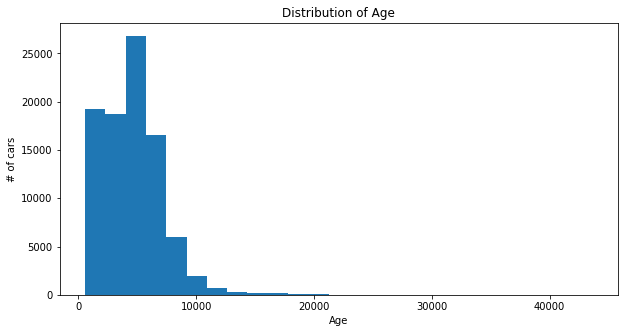

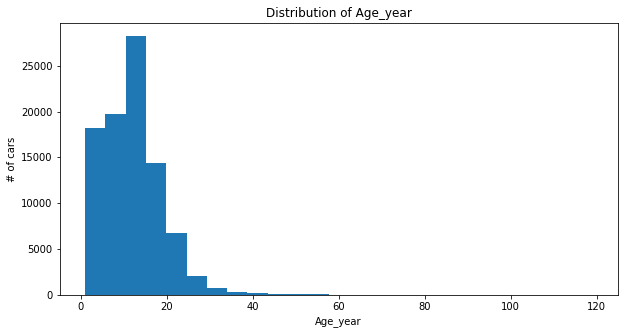

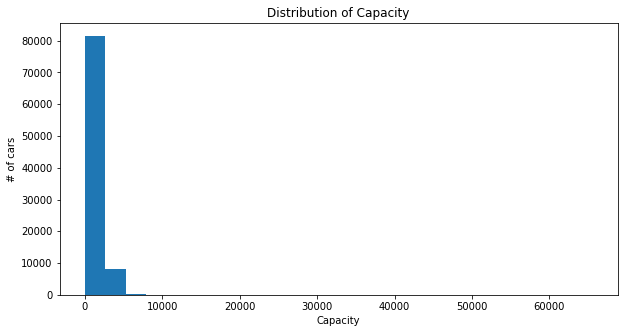

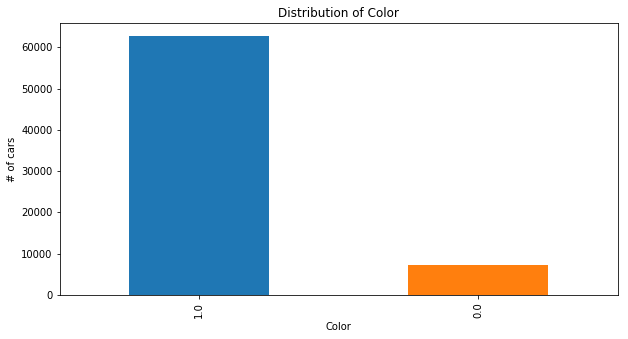

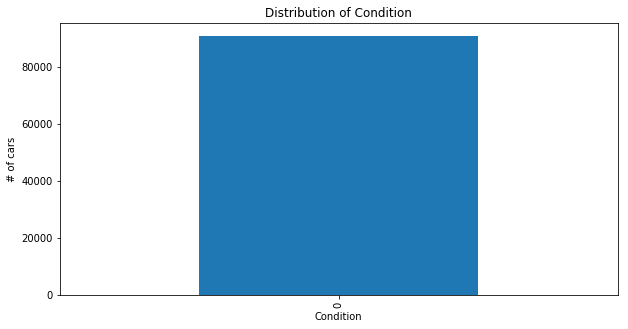

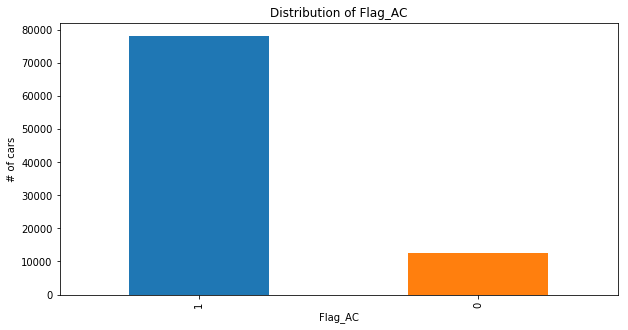

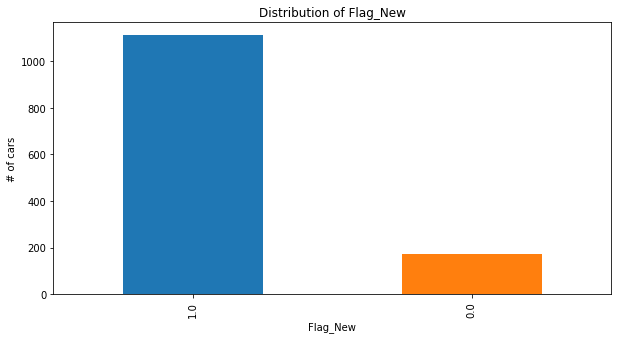

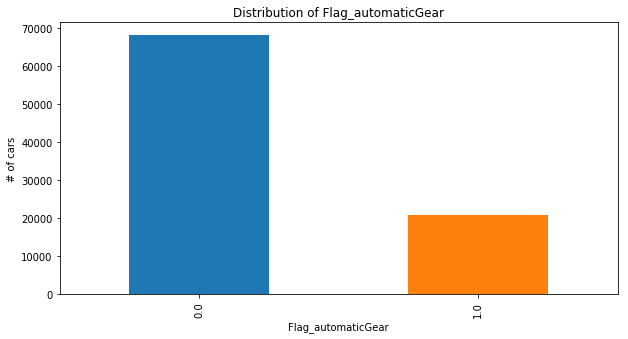

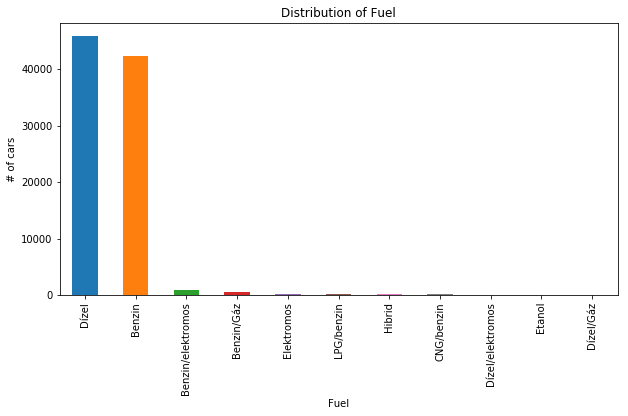

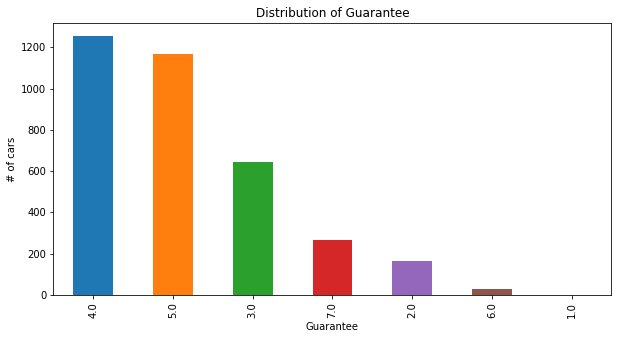

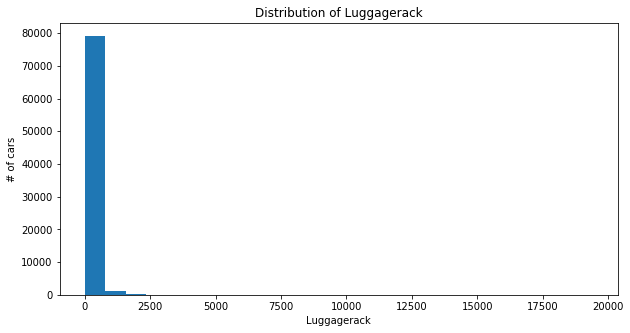

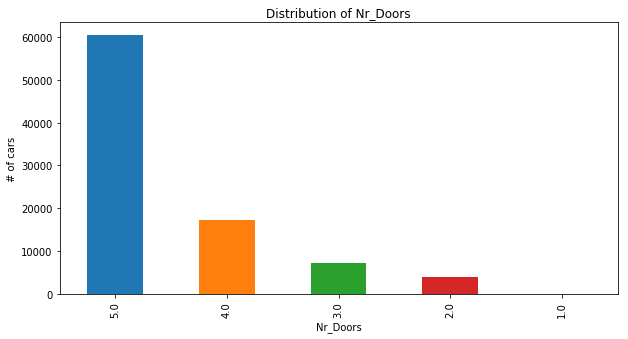

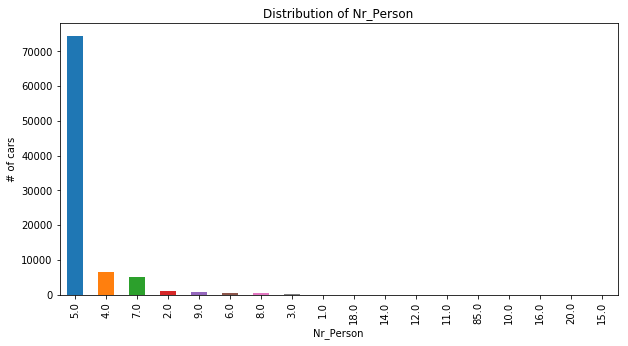

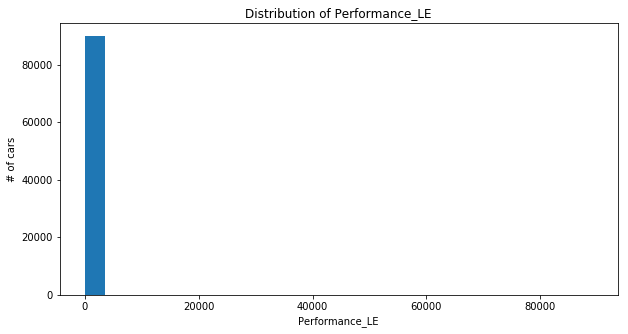

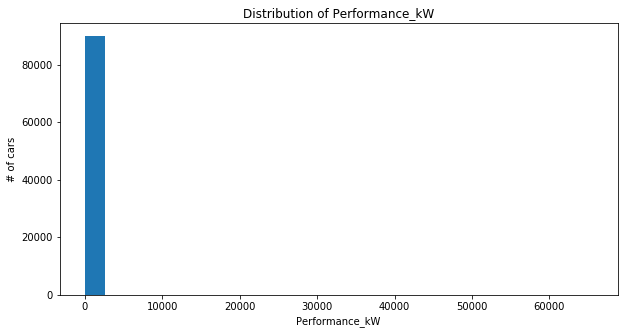

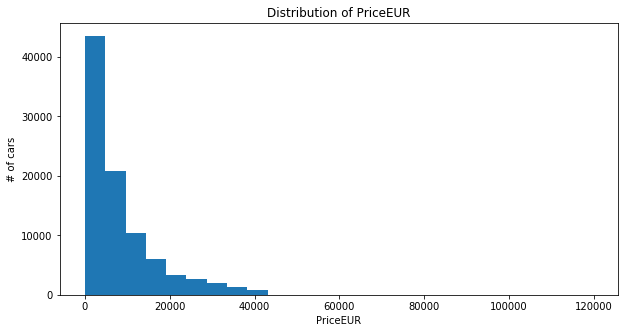

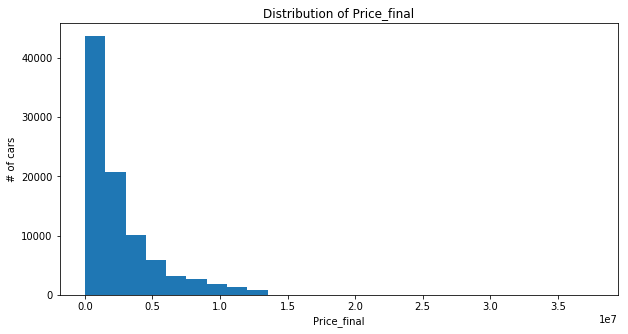

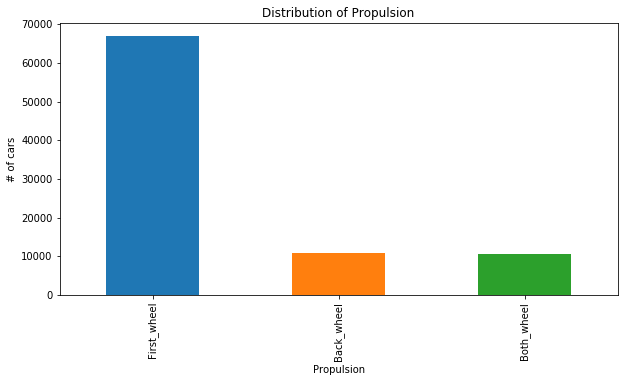

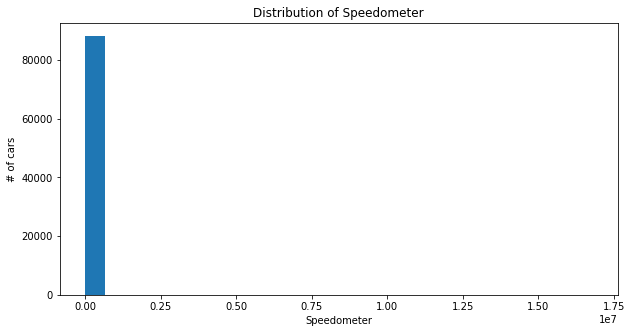

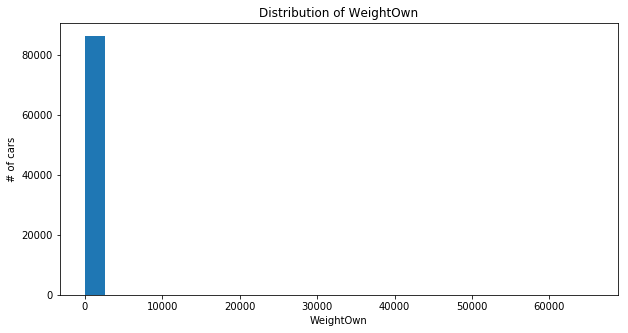

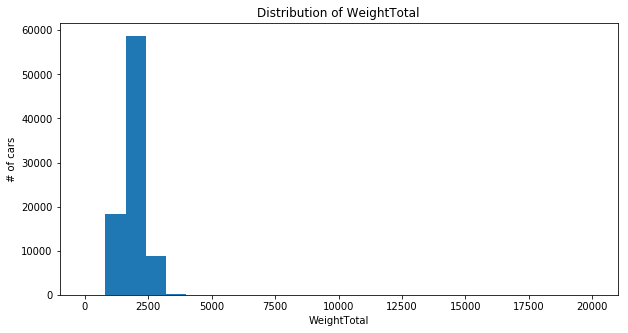

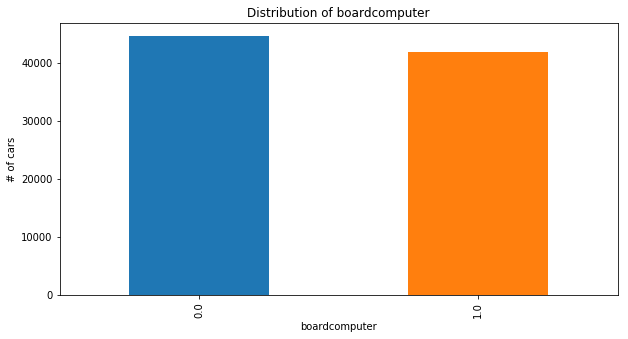

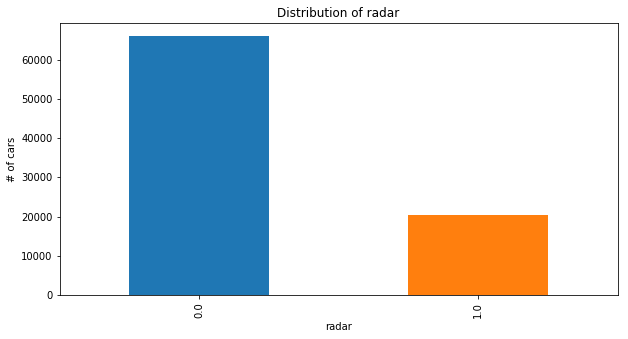

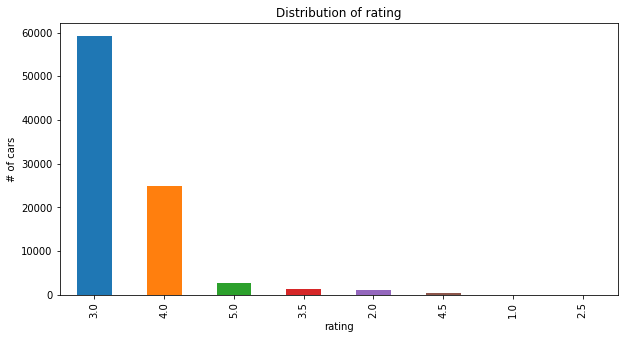

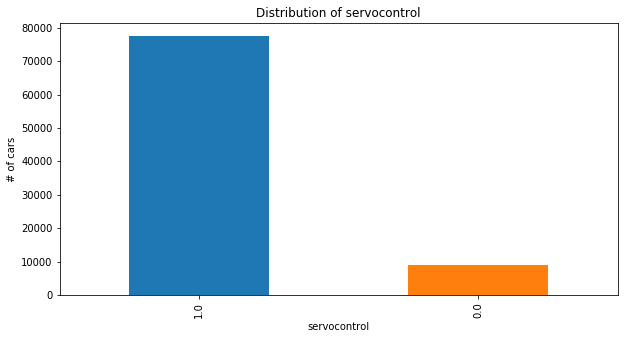

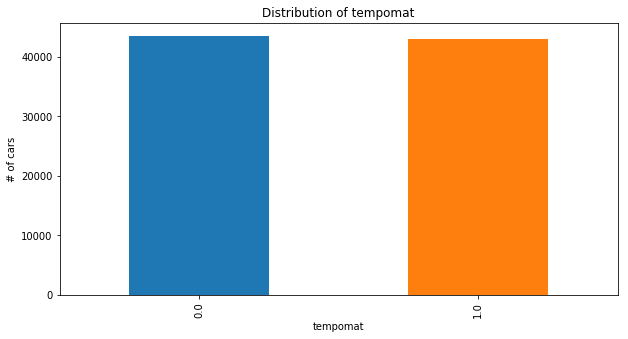

In [10]:
#check features: distribution - univariate analysis 
for feature in cols:
    cars_functions.check_features(df_cars, feature)


### 1.3. Treatment of missings

#### 1.3.1 - Target variable - PriceEUR
* no missing is allowed for the target variable

In [11]:
df_cars2=df_cars.dropna(subset = ['PriceEUR'])

#### 1.3.2 - Age, Flag_AC, Condition
* no missings

#### 1.3.3 - WeightTotal, WeightOwn, rating, Nr_Doors, Nr_Person,  Luggagerack
* by some variables I will substitute the most common value of the feature for each cartype 
* All the data, which still has missing features after substituting with the most common value will be dropped

In [12]:
#for the remaining features,I will substitute the most common value for the car type
#takes long time!!!!!!!!!!!!!!!!!!
cars_functions.get_missing('Propulsion', df_cars2)
cars_functions.get_missing('WeightOwn', df_cars2)
cars_functions.get_missing('WeightTotal', df_cars2)
cars_functions.get_missing('rating', df_cars2)
cars_functions.get_missing('Nr_Doors', df_cars2)
cars_functions.get_missing('Fuel', df_cars2)
cars_functions.get_missing('Luggagerack', df_cars2)
cars_functions.get_missing('Nr_Person', df_cars2)


In [13]:
df_cars2=df_cars2.dropna(subset = ['Propulsion'])
df_cars2=df_cars2.dropna(subset = ['WeightOwn'])
df_cars2=df_cars2.dropna(subset = ['WeightTotal'])
df_cars2=df_cars2.dropna(subset = ['rating'])
df_cars2=df_cars2.dropna(subset = ['Nr_Doors'])
df_cars2=df_cars2.dropna(subset = ['Fuel'])
df_cars2=df_cars2.dropna(subset = ['Luggagerack'])
df_cars2=df_cars2.dropna(subset = ['Nr_Person'])


#### 1.3.4 - Capacity, Performance_LE/Performance_kW, Speedometer

* There are some significant variables, where I won't use the substitution by the most common value
* in that case the missings will be dropped
* Performance_LE and Performance_kW have missings the same time

In [14]:
df_cars2=df_cars2.dropna(subset = ['Capacity'])
df_cars2=df_cars2.dropna(subset = ['Performance_LE'])
df_cars2=df_cars2.dropna(subset = ['Speedometer'])


#### 1.3.5 - Guarantee, boardcomputer, radar, servocontrol, tempomat, Flag_automaticGear
* There are variables, where the missing value means, that the feature doesn't available for the car

In [15]:
df_cars2['Guarantee']=df_cars2['Guarantee'].fillna(0)
df_cars2['boardcomputer']=df_cars2['boardcomputer'].fillna(0)
df_cars2['radar']=df_cars2['radar'].fillna(0)
df_cars2['servocontrol']=df_cars2['servocontrol'].fillna(0)
df_cars2['tempomat']=df_cars2['tempomat'].fillna(0)
df_cars2['Flag_automaticGear']=df_cars2['Flag_automaticGear'].fillna(0)
df_cars2['Flag_New']=df_cars2['Flag_New'].fillna(0)


#### 1.3.6 - Color
* Feautes with more than 10% of missings will be dropped - Color
* The target variable will be PriceEUR. Price_final (price in HUF) will be dropped

In [16]:
df_cars2=df_cars2.drop('Color', axis=1)
#df_cars2.drop(['Price_sale', 'Price_base', 'Price_extras', 'Technicalexam', 'WeightOwn','Color','Total_price', 'Price', 'title'], axis=1)
df_cars2=df_cars2.drop('Price_final', axis=1)

In [17]:
#check missings again
print(df_cars.shape)
print(df_cars2.shape)
df_cars2.isnull().sum(axis=0) 


(90874, 30)
(84872, 28)


Nr_Doors              0
Luggagerack           0
Guarantee             0
Propulsion            0
Capacity              0
Speedometer           0
WeightOwn             0
Nr_Person             0
ad_nr                 0
boardcomputer         0
producer              0
radar                 0
rating                0
servocontrol          0
tempomat              0
title                 0
type                  0
Condition             0
PriceEUR              0
WeightTotal           0
Fuel                  0
Flag_New              0
Flag_AC               0
Flag_automaticGear    0
Performance_kW        0
Performance_LE        0
Age                   0
Age_year              0
dtype: int64

### 1.4 - Check outliers for each feature

#### 1.4.1 - Nr_Doors  

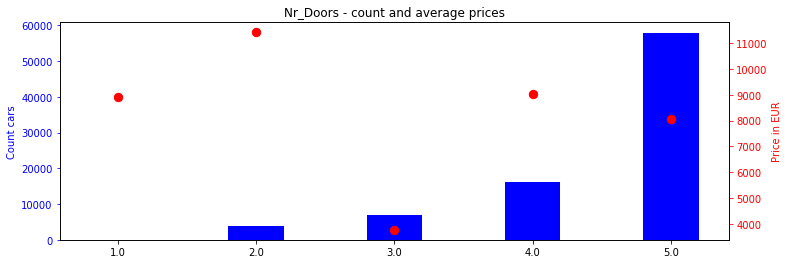

In [18]:
#The number of doors can vary between 1 and 5. There is only 1 car with one door - this one car will be dropped (ad_nr: 12053720)
cars_functions.plot_bar(df_cars2, 'Nr_Doors', figsize=(12,4), width=0.4)

In [19]:
df_cars2=df_cars2[df_cars2.Nr_Doors>1]
features_final=['Nr_Doors']
features_filt=['Nr_Doors']

#### 1.4.2 - Luggagerack 

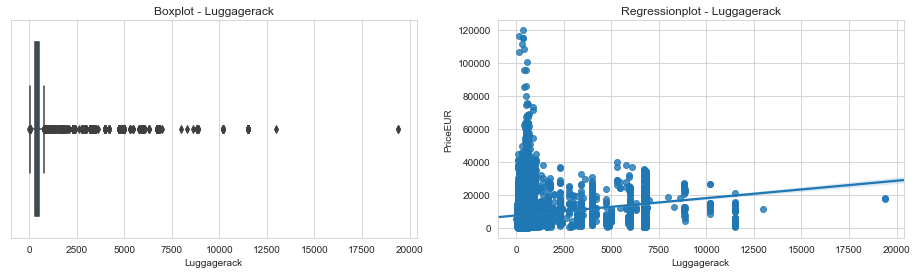

In [20]:
#outliers: According to the boxplot, I will define the outliers only after 3times the IQR
cars_functions.plot_box_reg(df_cars2, 'Luggagerack')

In [21]:
df_cars2.sort_values('Luggagerack', ascending=False).head(10).groupby(['producer', 'type', 'Luggagerack']).count().iloc[:,0]

producer  type    Luggagerack
FIAT      DUCATO  11500.0        7
                  13000.0        1
OPEL      MOVANO  19393.0        2
Name: Nr_Doors, dtype: int64

In [22]:
#The values above 11500 will be set to 11500 (3 values)
cars_functions.treat_outliers(df_cars2, 'Luggagerack', 11500, features_final, features_filt)

The number of outliers in the dataset regarding the Luggagerack is : 3


In [23]:
features_final

['Nr_Doors', 'Luggagerack_final']

#### 1.4.3 - Capacity

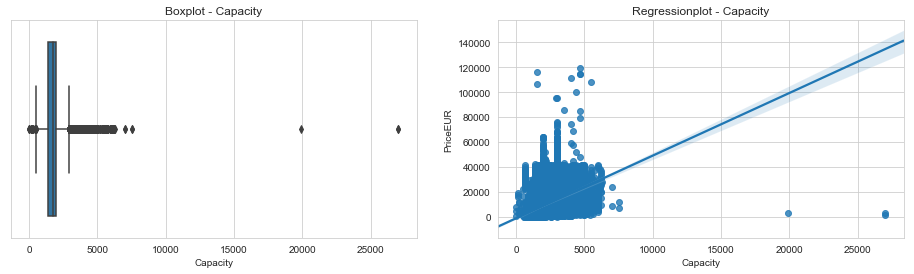

In [24]:
cars_functions.plot_box_reg(df_cars2, 'Capacity')

In [25]:
cars_functions.treat_outliers(df_cars2, 'Capacity', 5000,  features_final, features_filt)

The number of outliers in the dataset regarding the Capacity is : 189


#### 1.4.4 - Speedometer

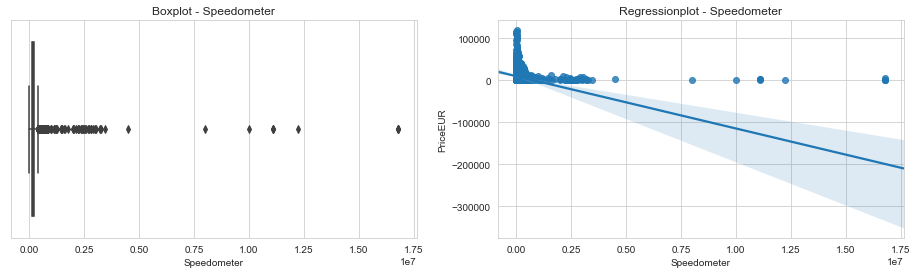

In [26]:
#outliers: The IQR-rule is used to define the outliers - whiskers is set to 1.5. Outliers only on one side
cars_functions.plot_box_reg(df_cars2, 'Speedometer')

In [27]:
df_cars2.sort_values('Speedometer', ascending=False).head(20)

,Nr_Doors,Luggagerack,Guarantee,Propulsion,Capacity,Speedometer,WeightOwn,Nr_Person,ad_nr,boardcomputer,...,Flag_AC,Flag_automaticGear,Performance_kW,Performance_LE,Age,Age_year,Luggagerack_final,Luggagerack_filt,Capacity_final,Capacity_filt
51079,5.0,400.0,0.0,Both_wheel,1995.0,16777215.0,1370.0,5.0,12287591,0.0,...,1,0.0,85.0,116.0,5642,15.0,400.0,400.0,1995.0,1995.0
4057,3.0,275.0,0.0,First_wheel,1108.0,16777215.0,865.0,5.0,12241220,0.0,...,0,0.0,40.0,54.0,9174,25.0,275.0,275.0,1108.0,1108.0
5226,5.0,495.0,0.0,First_wheel,1896.0,16777215.0,1435.0,5.0,12112968,0.0,...,1,0.0,96.0,131.0,6007,16.0,495.0,495.0,1896.0,1896.0
4579,5.0,450.0,0.0,First_wheel,1390.0,16777215.0,1000.0,5.0,12290769,0.0,...,0,0.0,43.0,58.0,10755,29.0,450.0,450.0,1390.0,1390.0
10922,5.0,350.0,0.0,First_wheel,1689.0,12222222.0,1080.0,5.0,12259735,0.0,...,1,0.0,66.0,90.0,7833,21.0,350.0,350.0,1689.0,1689.0
26272,4.0,520.0,0.0,Back_wheel,2685.0,11111111.0,1540.0,5.0,12222176,0.0,...,1,1.0,125.0,170.0,6403,17.0,520.0,520.0,2685.0,2685.0
36827,3.0,215.0,0.0,Both_wheel,2972.0,11111111.0,1705.0,4.0,12315507,0.0,...,0,1.0,110.0,150.0,10117,27.0,215.0,215.0,2972.0,2972.0
3920,3.0,255.0,0.0,First_wheel,1149.0,11111111.0,880.0,5.0,12217470,0.0,...,0,0.0,44.0,60.0,7317,20.0,255.0,255.0,1149.0,1149.0
11779,4.0,365.0,0.0,First_wheel,1298.0,9999999.0,830.0,5.0,12203573,0.0,...,0,0.0,50.0,68.0,7774,21.0,365.0,365.0,1298.0,1298.0
3923,5.0,245.0,0.0,First_wheel,1390.0,8000000.0,910.0,5.0,12223069,0.0,...,0,0.0,44.0,60.0,8320,22.0,245.0,245.0,1390.0,1390.0


In [28]:
#1.model: drop the outliers
#2.model: set the value of age to the maximum available value, which is not defined as outlier
#all values above 3000000 are outliers  
cars_functions.treat_outliers(df_cars2, 'Speedometer', 3000000,  features_final, features_filt)

The number of outliers in the dataset regarding the Speedometer is : 17


#### 1.4.5 - WeightOwn

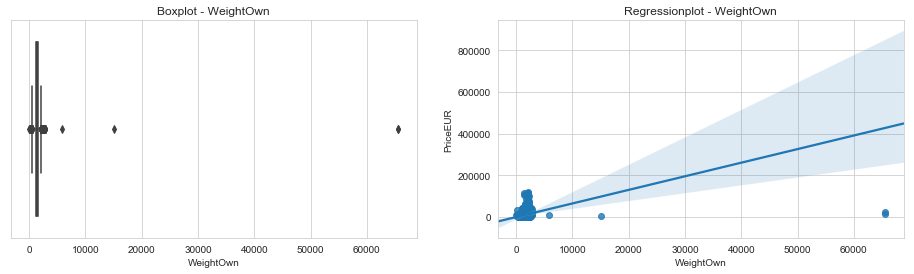

In [29]:
cars_functions.plot_box_reg(df_cars2, 'WeightOwn')

In [30]:
#1.model: drop the outliers
#2.model: set the value of age to the maximum available value, which is not defined as outlier
#outleiers are above 2800
cars_functions.treat_outliers(df_cars2, 'WeightOwn', 2800,  features_final, features_filt)

The number of outliers in the dataset regarding the WeightOwn is : 7


#### 1.4.6. - Nr_Person

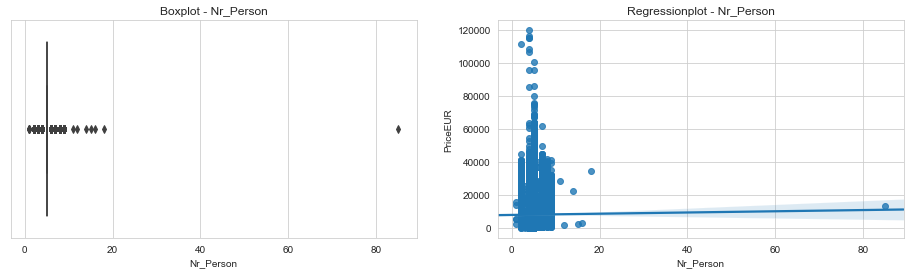

In [31]:
#There is an outlier, where the number of person is set to 85- drop this car
cars_functions.plot_box_reg(df_cars2, 'Nr_Person')
df_cars2=df_cars2[df_cars2.Nr_Person<20]

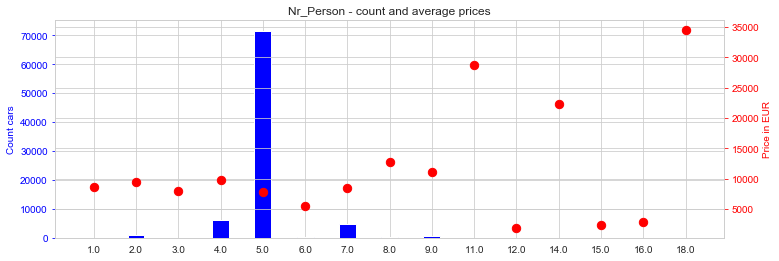

In [32]:
#almost all the cars have 5 seats -> building groups <5; 5; >5 seats
cars_functions.plot_bar(df_cars2, 'Nr_Person', figsize=(12,4), width=0.4, n_cols=15)

In [33]:
#define 3 groups based on the Nr_Person feature: <5; 5; >5 seats
df_cars2['Nr_Person_gr']=df_cars2['Nr_Person'].apply(cars_functions.nr_person_group)

In [34]:
features_final.append('Nr_Person_gr')
features_filt.append('Nr_Person_gr')

#### 1.4.7 - rating

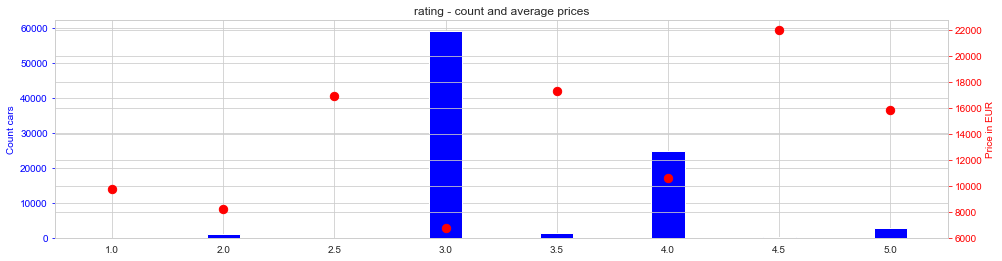

In [35]:
cars_functions.plot_bar(df_cars, 'rating', width=0.3, figsize=(16,4))

In [36]:
#define 3 groups based on the rating feature:  <3; ==3; >3
df_cars2['Rating_gr']=df_cars2['rating'].apply(cars_functions.rating_group)

features_final.append('Rating_gr')
features_filt.append('Rating_gr')


#### 1.4.8 - WeightTotal

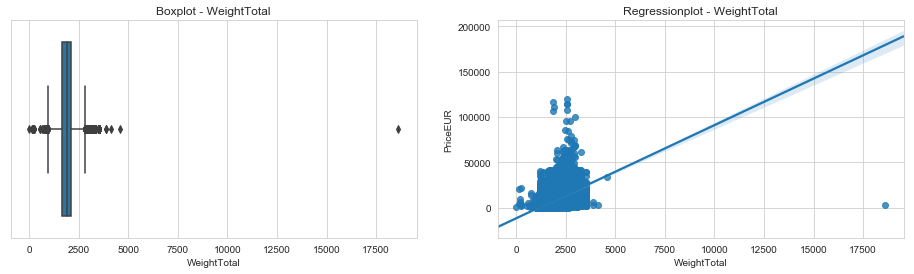

In [37]:
cars_functions.plot_box_reg(df_cars2, 'WeightTotal')

In [38]:
#there is one car with a probably mistyped weight - 
df_cars2[df_cars2.WeightTotal>10000][['producer', 'type', 'WeightOwn', 'WeightTotal']]

,producer,type,WeightOwn,WeightTotal
35177,MERCEDES-BENZ,200,1340.0,18605.0


In [39]:
#this one car will be dropped 
df_cars2=df_cars2[df_cars2.WeightTotal<10000]

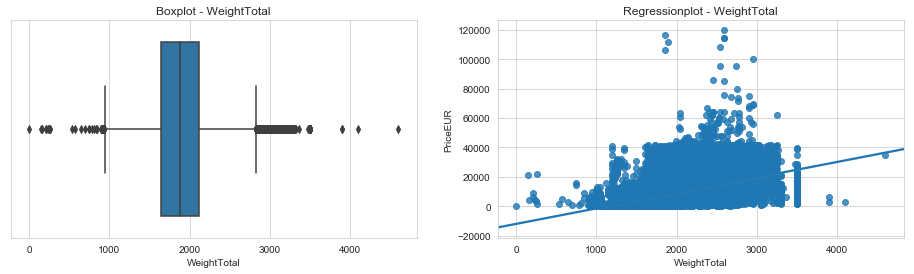

In [40]:
cars_functions.plot_box_reg(df_cars2, 'WeightTotal')

In [41]:
#1.model: drop the outliers
#2.model: set the value of age to the maximum available value, which is not defined as outlier
#outleiers are above 3500
cars_functions.treat_outliers(df_cars2, 'WeightTotal', 3500,  features_final, features_filt)

The number of outliers in the dataset regarding the WeightTotal is : 4


#### 1.4.9 - Guarantee

In [42]:
df_cars2.groupby('Guarantee')['PriceEUR'].agg(['mean','count']).reset_index()

,Guarantee,mean,count
0,0.0,7773.344990,82901
1,2.0,21691.082474,97
2,3.0,17392.792208,462
3,4.0,19500.435374,588
4,5.0,20142.368421,627
5,6.0,14280.956522,23
6,7.0,18627.994152,171


In [43]:
#create a new feature instead of guarantee - Flag_Guarantee: 
df_cars2['Flag_Guarantee']=df_cars2.Guarantee.apply(lambda x: 1 if x>0 else 0)

features_final.append('Flag_Guarantee')
features_filt.append('Flag_Guarantee')

#### 1.4.10 - Performance_kW, Performance_LE

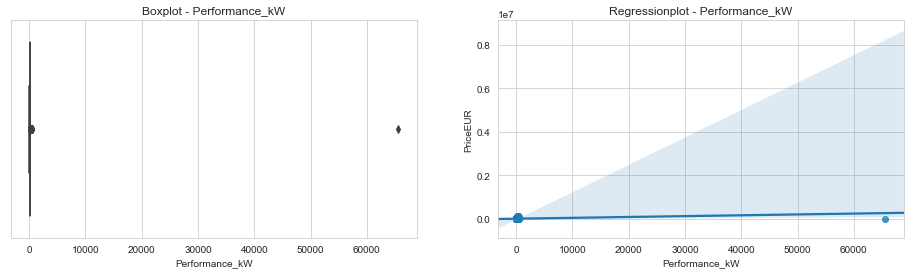

In [44]:
cars_functions.plot_box_reg(df_cars2, 'Performance_kW')

In [45]:
#there is one car with a probably mistyped performance - 
df_cars2.sort_values('Performance_kW', ascending=False)[['Performance_kW', 'Performance_LE','producer', 'type']].head(10)

,Performance_kW,Performance_LE,producer,type
54523,65535.0,89128.0,VOLVO,S40
66697,552.0,751.0,FORD,MUSTANG
91961,515.0,700.0,AUDI,RS6
90301,485.0,660.0,MITSUBISHI,LANCER
92661,450.0,612.0,MERCEDES-BENZ,CL-OSZTÁLY
81629,446.0,607.0,BMW,M SOROZAT
90682,443.0,602.0,BMW,M SOROZAT
3900,430.0,585.0,MERCEDES-BENZ,S-OSZTÁLY
88057,426.0,579.0,AUDI,RS6
338,423.0,575.0,BMW,X SOROZAT


In [46]:
#this one car will be dropped
df_cars2=df_cars2[df_cars2.Performance_kW<1000]

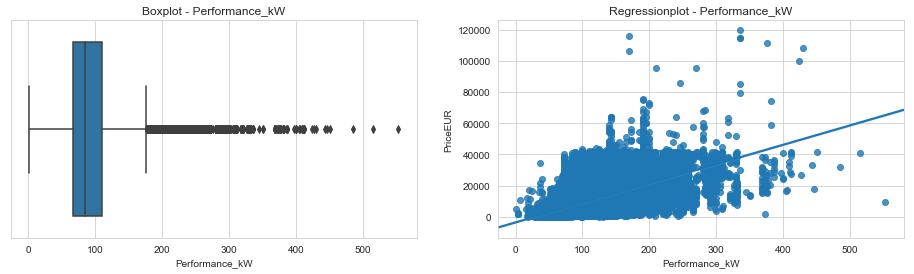

In [47]:
cars_functions.plot_box_reg(df_cars2, 'Performance_kW')

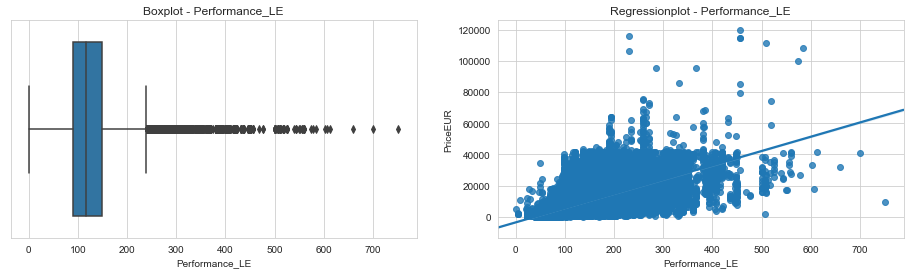

In [48]:
cars_functions.plot_box_reg(df_cars2, 'Performance_LE')

In [49]:
#1.model: drop the outliers
#2.model: set the value of age to the maximum available value, which is not defined as outlier
#outliers are defined above 400 for the feature Performance_kW and 545 for the feature Performance_LE
cars_functions.treat_outliers(df_cars2, 'Performance_kW', 400,  features_final, features_filt)
cars_functions.treat_outliers(df_cars2, 'Performance_LE', 545,  features_final, features_filt)




The number of outliers in the dataset regarding the Performance_kW is : 18
The number of outliers in the dataset regarding the Performance_LE is : 18


#### 1.4.11 - Age, Age_year

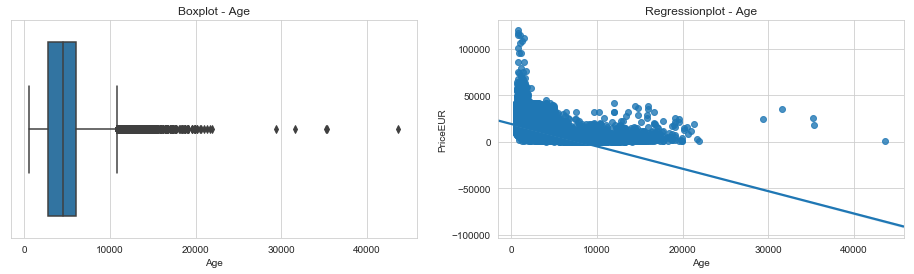

In [50]:
#outliers: The IQR-rule is used to define the outliers - whiskers is set to 1.5. Outliers only on one side
cars_functions.plot_box_reg(df_cars2, 'Age')

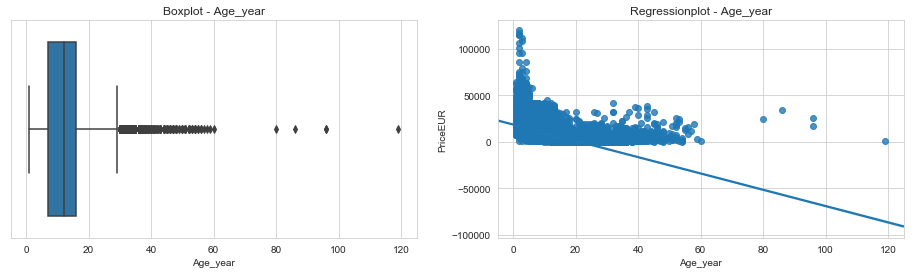

In [51]:
cars_functions.plot_box_reg(df_cars2, 'Age_year')

In [52]:
df_cars2.sort_values('Age', ascending=False)[['Age', 'Age_year','producer', 'type']].head(15)

,Age,Age_year,producer,type
9199,43627,119.0,WARTBURG,1.3
81633,35319,96.0,CITROEN,EGYÉB
87004,35196,96.0,EGYÉB,EGYÉB
91006,31574,86.0,FORD,EGYÉB
86482,29383,80.0,OPEL,EGYÉB
9494,21958,60.0,SKODA,OCTAVIA
31972,21713,59.0,VOLKSWAGEN,BOGÁR (KÄFER)
83293,21347,58.0,SKODA,FELICIA
70296,20951,57.0,MERCEDES-BENZ,190
63576,20586,56.0,LINCOLN,CONTINENTAL


In [53]:
#1.model: drop the outliers
#2.model: set the value of age to the maximum available value, which is not defined as outlier

age_outlier=20000
agey_outlier=54

cars_functions.treat_outliers(df_cars2, 'Age', 20000,  features_final, features_filt)
cars_functions.treat_outliers(df_cars2, 'Age_year', 54,  features_final, features_filt)

The number of outliers in the dataset regarding the Age is : 13
The number of outliers in the dataset regarding the Age_year is : 13


#### 1.4.12 - Propulsion

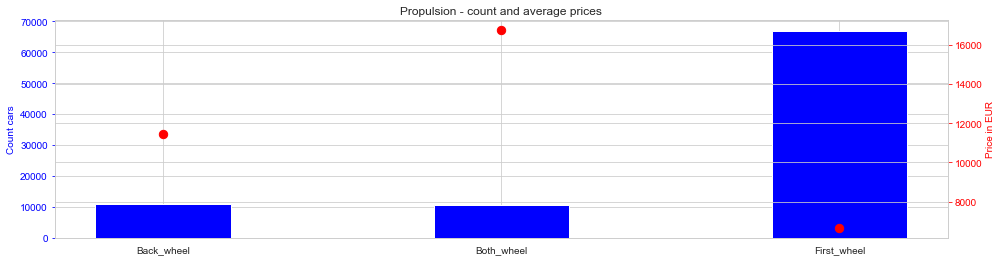

In [54]:
cars_functions.plot_bar(df_cars, 'Propulsion', figsize=(16,4))
#cars_functions.plot_bar(df_cars, 'rating', width=0.3, figsize=(16,4))

In [55]:
#define 2 variables for Flag_pr_first_w and Flag_pr_back_w. If both wheels, both flag are set to 1

df_cars2['Flag_first_w']=df_cars2['Propulsion'].apply(cars_functions.get_first)
df_cars2['Flag_back_w']=df_cars2['Propulsion'].apply(cars_functions.get_back)

In [56]:
features_final.extend(('Flag_first_w', 'Flag_back_w'))
features_filt.extend(('Flag_first_w', 'Flag_back_w'))

#### 1.4.12 - Fuel

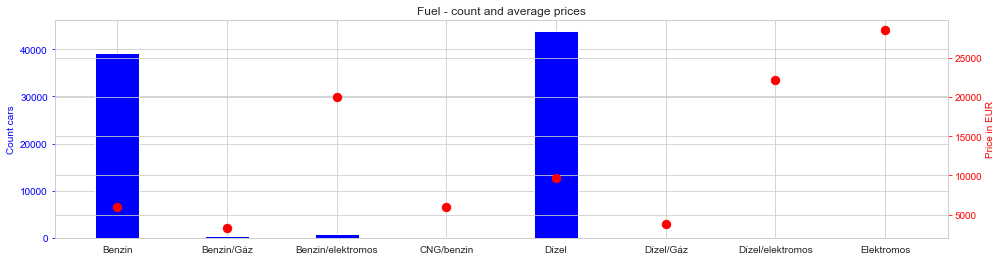

In [57]:
cars_functions.plot_bar(df_cars2, 'Fuel', figsize=(16,4), width=0.4, n_cols=8)

In [58]:
#make new flags based on diesel/benzin or electro
df_cars2['Flag_diesel']=df_cars2['Fuel'].apply(cars_functions.get_diesel)
df_cars2['Flag_benzin']=df_cars2['Fuel'].apply(cars_functions.get_benzin)
df_cars2['Flag_electro']=df_cars2['Fuel'].apply(cars_functions.get_electro)

In [59]:
features_final.extend(('Flag_diesel', 'Flag_benzin', 'Flag_electro'))
features_filt.extend(('Flag_diesel', 'Flag_benzin', 'Flag_electro'))

#### 1.4.13 - Condition ########not good

In [60]:
temp_c=df_cars2.groupby('Condition')['PriceEUR'].agg(['mean','count']).reset_index()
temp_c

,Condition,mean,count
0,0,8037.904675,84868


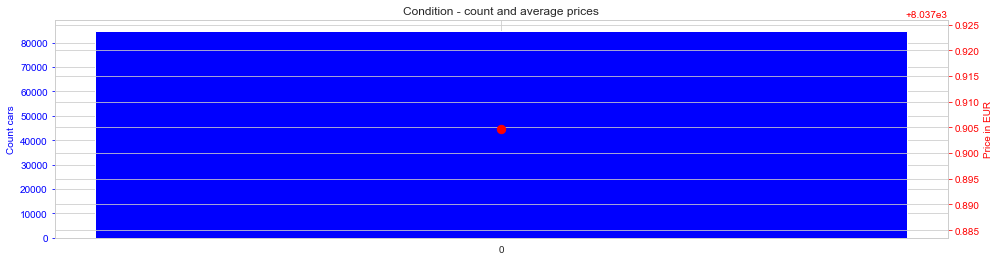

In [61]:
cars_functions.plot_bar(df_cars2, 'Condition', figsize=(16,4), width=0.4)

In [62]:
#define a variable Flag_Condition to check, if the car is in a good condition or not

df_cars2['Flag_Condition']=df_cars2['Condition'].apply(cars_functions.get_condition)
features_final.append('Flag_Condition')
features_filt.append('Flag_Condition')
####

#### 1.4.13 - Target variable: PriceEUR

Text(0.5, 1.0, 'Boxplot - PriceEUR')

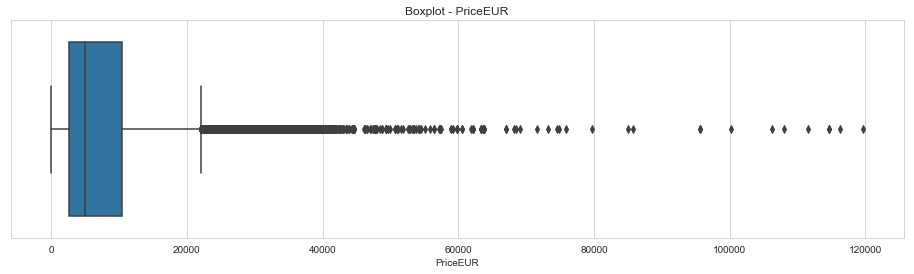

In [63]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(figsize=(16, 4))
ax = sns.boxplot(x=df_cars2.PriceEUR)
ax.set_title('Boxplot - PriceEUR')

In [64]:
#there are values with 0 EUR - not possible
df_cars2.PriceEUR.describe()

count     84868.000000
mean       8037.904675
std        8431.795402
min           0.000000
25%        2540.000000
50%        4936.000000
75%       10356.000000
max      119631.000000
Name: PriceEUR, dtype: float64

In [65]:
df_cars2.sort_values('PriceEUR')['PriceEUR'].head()
#there is only one car with 0 EUR
df_cars2=df_cars2[df_cars2['PriceEUR']>0]

#### 1.4.13 - Producer

In [66]:
print('There are in total %s different producers.'%(len(df_cars2.producer.unique())))

There are in total 66 different producers.


In [72]:
producers_top25=cars_functions.df_groupby_to_plot(df_cars2,'producer', 'PriceEUR',['count', 'mean', 'min', 'max', 'median', 'std'])
producers_top25=producers_top25.sort_values('count', ascending=False).head(23)
producers_top25.head()
#define producers with at least 450 cars. Rest: no flag for producer.
list_producers_top=producers_top25[producers_top25['count']>450].producer.values
list_producers_top

array(['OPEL', 'VOLKSWAGEN', 'BMW', 'FORD', 'MERCEDES-BENZ', 'AUDI',
       'RENAULT', 'TOYOTA', 'SKODA', 'PEUGEOT', 'MAZDA', 'SUZUKI', 'FIAT',
       'CITROEN', 'NISSAN', 'HONDA', 'VOLVO', 'SEAT', 'HYUNDAI', 'KIA',
       'MITSUBISHI', 'ALFA ROMEO', 'CHEVROLET'], dtype=object)

In [73]:
#producers_top25=df_cars2.groupby('producer')['PriceEUR'].agg(['count', 'mean', 'min', 'max', 'median', 'std']).reset_index().sort_values('count', ascending=False).head(23)
#define producers with at least 450 cars. Rest: no flag for producer.

#list_producers_top=producers_top25[producers_top25['count']>450].producer.values
#df_cars2['Producer_top']=df_cars2['producer'].apply(lambda x: x if x in list_producers_top else 'REST')


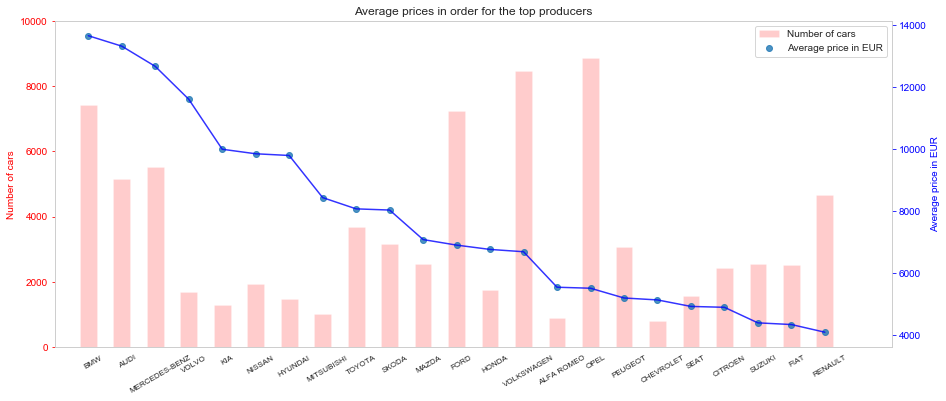

In [74]:
cars_functions.plot_producers(producers_top25,'producer','count', 'Number of cars','mean','Average price in EUR',[0,25,0,10000], 'Average prices in order for the top producers')


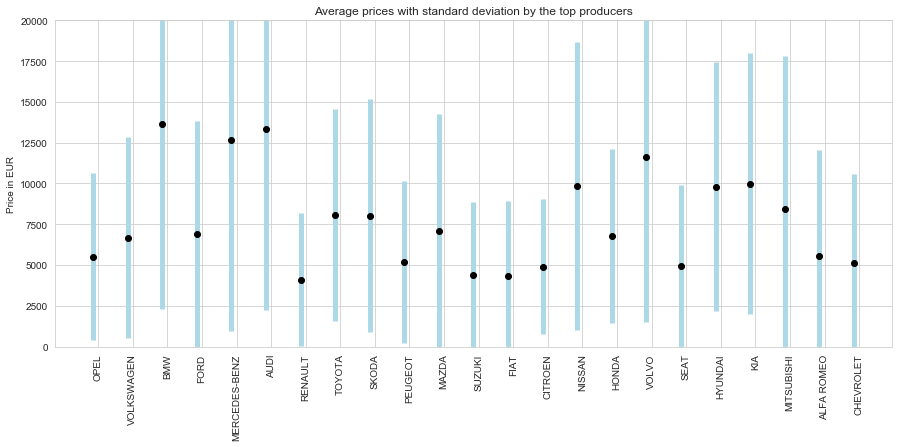

In [75]:
x=np.arange(1,len(producers_top25['mean'])+1)
y=producers_top25['mean']
dy=producers_top25['std']
#plt.hist(producers_top25.producer,producers_top25.count )
#plt.figure(figsize=(15,6))
fig, ax=plt.subplots(figsize=(15,6))
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
                    ecolor='lightblue', elinewidth=5, capsize=0);
plt.ylim(0,20000)
ax.set_ylabel('Price in EUR')
ax.set_title('Average prices with standard deviation by the top producers')
ax.set_xticks(x + 0.3 / 2)
ax.set_xticklabels(list_producers_top, rotation=90)
plt.show()

# New feature based on car classification

In [76]:
#check cartypes - into subcategories
df_cartypes=pd.read_excel('Cartypes.xlsx')

In [77]:
df_cartypes.head()

,Car,Germanclass,EU class
0,AUSTIN MINI,MINIS,A
1,CHEVROLET MATIZ,MINIS,A
2,CHEVROLET SPARK,MINIS,A
3,CITROEN C1,MINIS,A
4,DAIHATSU CUORE,MINIS,A


In [78]:
#there are some cars, whcih appear in 2 categories - drop duplicates and keep the first category

print(df_cartypes.groupby('Car').count().iloc[:,-1].value_counts())
df_cartypes=df_cartypes.drop_duplicates(subset='Car', keep='first')

1    555
2     11
Name: EU class, dtype: int64


In [79]:
#some rows contains more cars than one - transform these rows, that only one car is in each row
cartypes_more=[]
for i,row in df_cartypes.iterrows():
    if str(row['Car']).find(',')>-1:
        start=str(row['Car']).find(',')
        producer=row['Car'][:(str(row['Car']).find(' '))]
        cartypes_more.append([row['Car'][:start], row['Germanclass'], row['EU class']])
        end=str(row['Car'][(start+2):]).find(',')
        if end==-1:
            new_type=producer+' '+row['Car'][(start+2):]
            cartypes_more.append([new_type, row['Germanclass'], row['EU class']])
        else:
            new_type2=producer+' '+row['Car'][(start+2+end+2):]
            new_type=producer+' '+row['Car'][(start+2):(start+2+end)]
            cartypes_more.append([new_type2, row['Germanclass'], row['EU class']])
            cartypes_more.append([new_type, row['Germanclass'], row['EU class']])

#add the EU classes as cars
cartypes_more.append(['A', 'MINIS', 'A'])
cartypes_more.append(['B', 'KLEINWAGEN', 'B'])
cartypes_more.append(['C','KOMPAKTKLASSE', 'C'])
cartypes_more.append(['D',  'MITTELKLASSE', 'D'])
cartypes_more.append(['E','OBERE MITTELKLASSE', 'E'])
cartypes_more.append(['SUV',  'SUVs', 'SUV'])
cartypes_more.append(['U', 'UTILITIES', 'U'])
cartypes_more.append(['S', 'SPORTWAGEN', 'S'])
cartypes_more.append(['M', 'MINI-VANS', 'M'])
print(len(cartypes_more))


52


In [80]:
#add the new list to the  original dataframe df_cartypes
df_cartypes_more = pd.DataFrame(cartypes_more,columns=['Car','Germanclass','EU class'])
df_cartypes=df_cartypes.append(df_cartypes_more)

In [81]:
# create the column cartype by merging the producer andthe type
df_cars2['cartype']=df_cars2['producer']+' '+df_cars2['type']

# create the column cartype_corr by using the function with the transformations
df_cars2['cartype_corr']=df_cars2['cartype'].apply(cars_functions.get_cartype)


In [82]:
df_cars3=df_cars2.merge(df_cartypes, left_on='cartype_corr', right_on='Car', how='left')

In [83]:
#208 cars is without classification - drop these 
df_cars3[df_cars3['Car'].isnull()]['cartype_corr'].value_counts().sum()

208

In [84]:
df_cars3=df_cars3[df_cars3['Car'].notnull()]

In [85]:
df_cars3['EU class'].value_counts()

C      23967
D      18230
B      13150
E       5847
V       4704
SUV     4222
G       3771
M       3684
A       2725
U       2016
F       1451
S        956
Name: EU class, dtype: int64

In [86]:
df_cars3['class_aggr']=df_cars3['EU class'].apply(cars_functions.get_class_aggr)

In [87]:
df_cars3['class_aggr'].value_counts()

C      23967
D      18230
B      13150
SUV    10009
V       8388
E       5847
A       2725
F       1451
S        956
Name: class_aggr, dtype: int64

In [88]:
df_cars3['Germanclass'].value_counts()

KOMPAKTKLASSE         23967
MITTELKLASSE          18230
KLEINWAGEN            13150
OBERE MITTELKLASSE     5847
GROSSRAUM-VANS         4704
SUVs                   4222
GELÄNDEWAGEN           3771
MINI-VANS              3684
MINIS                  2725
UTILITIES              2016
OBERKLASSE             1451
SPORTWAGEN              956
Name: Germanclass, dtype: int64

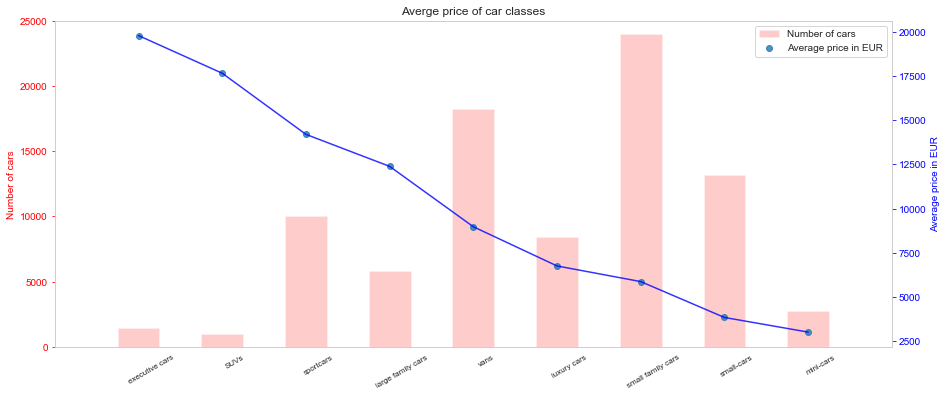

In [89]:
df_classes=cars_functions.df_groupby_to_plot(df_cars3,'class_aggr', 'PriceEUR',['count', 'mean', 'min', 'max'])
df_classes['car_class']=['mini-cars', 'small-cars', 'small family cars', 'vans', 'large family cars', 'executive cars', 'SUVs', 'sportcars', 'luxury cars']

cars_functions.plot_producers(df_classes,'car_class','count', 'Number of cars','mean','Average price in EUR',[0,10,0,25000], 'Averge price of car classes')



In [ ]:
df_classes2=cars_functions.df_groupby_to_plot(df_cars3,'Germanclass', 'PriceEUR',['count', 'mean', 'min', 'max'])

cars_functions.plot_producers(df_classes2,'Germanclass','count', 'Number of cars','mean','Average price in EUR',[0,13,0,25000], 'Averge price of car classes')


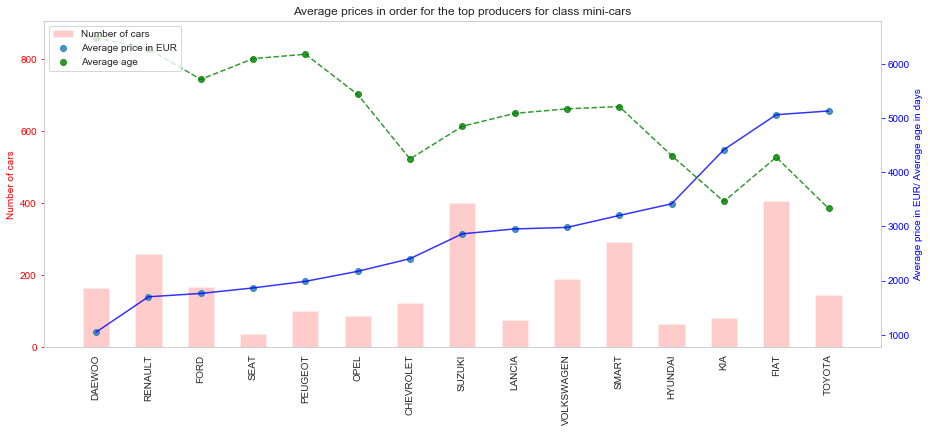

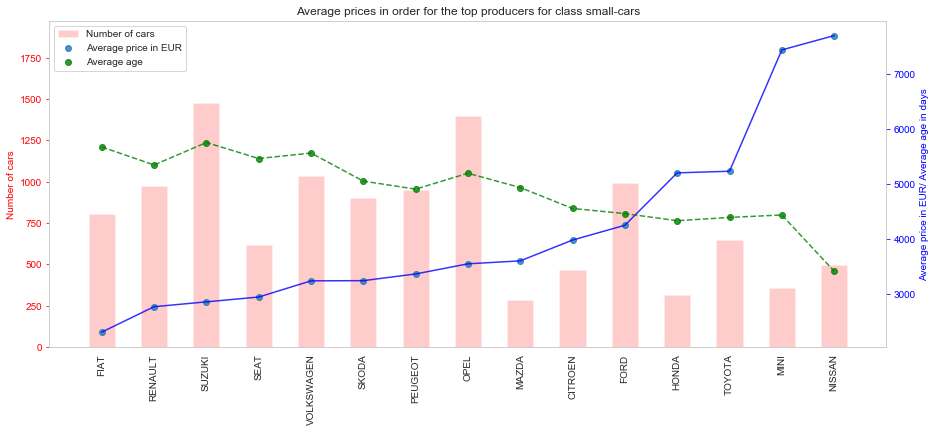

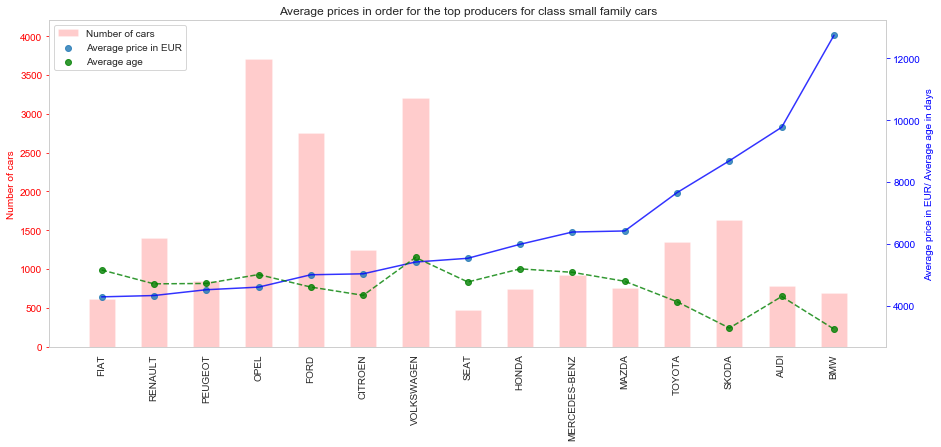

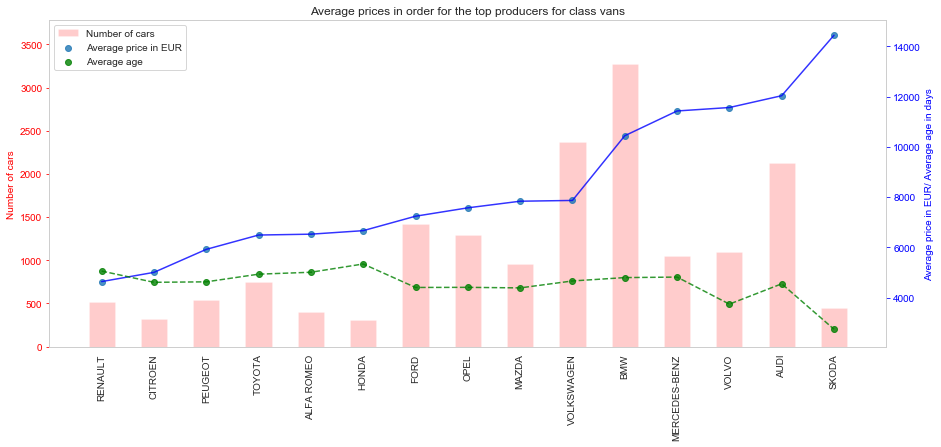

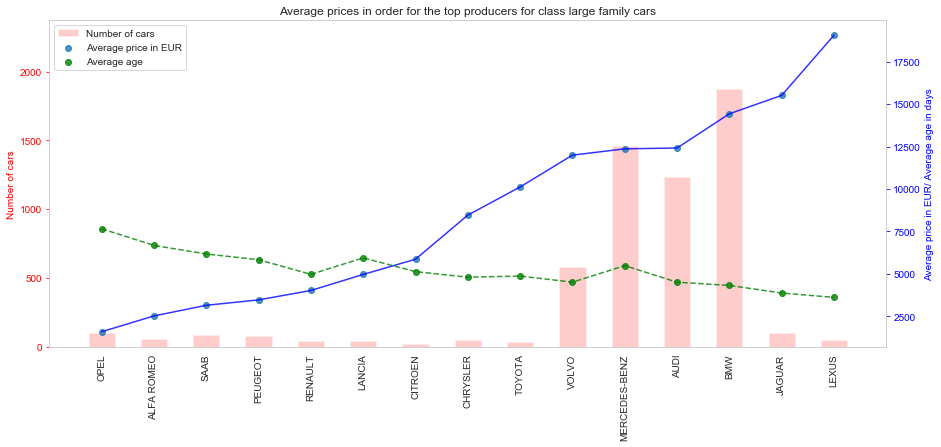

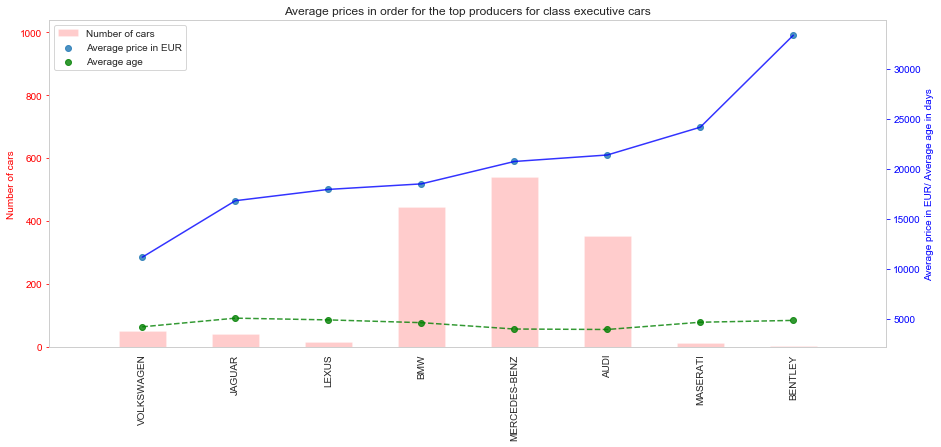

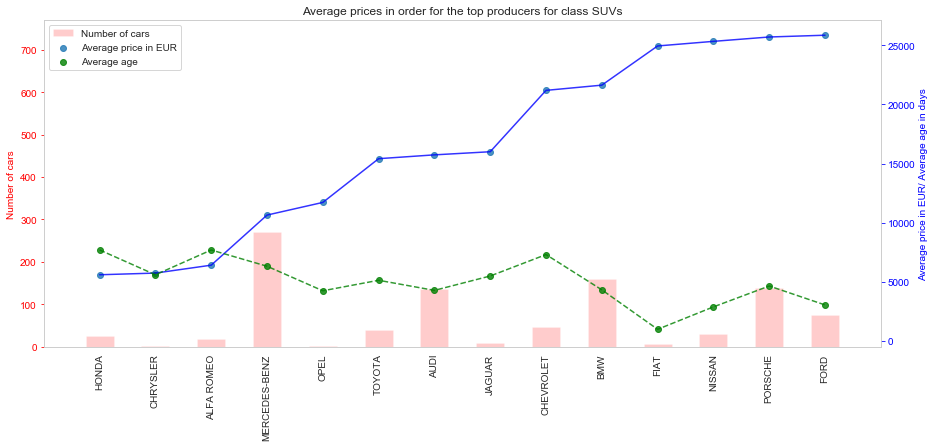

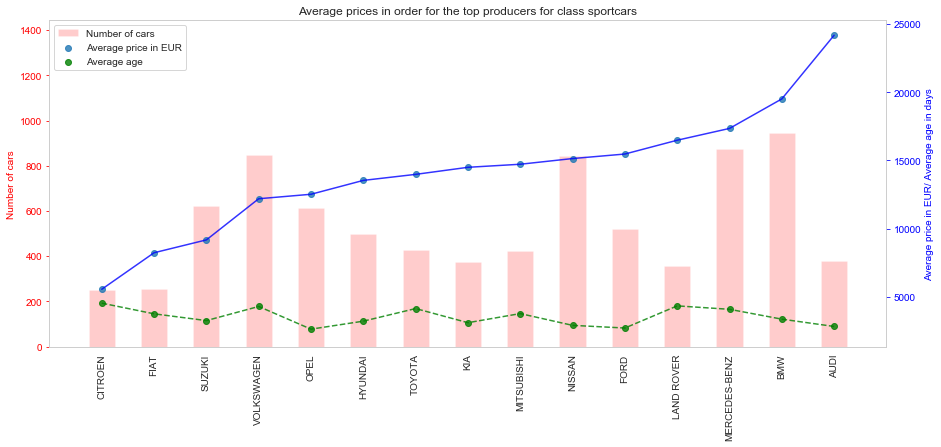

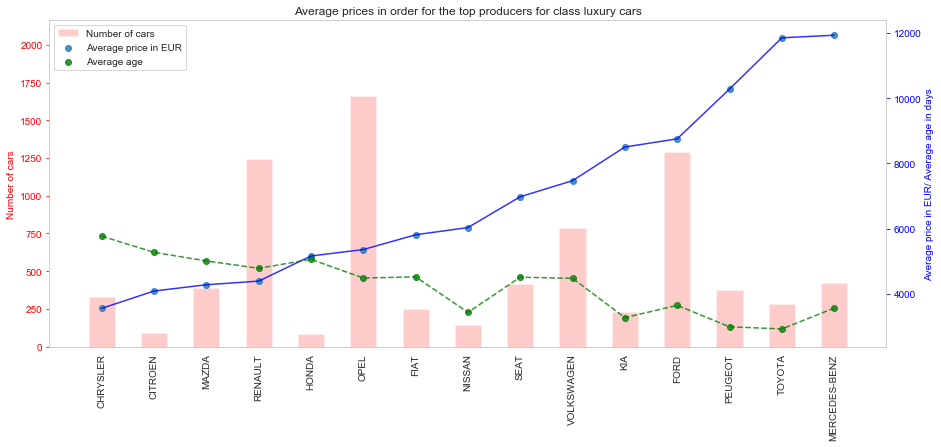

In [92]:
#average prices per manufacturer
x_list_class=df_classes['class_aggr'].values
x_list_class_label=['mini-cars', 'small-cars', 'small family cars', 'vans', 'large family cars', 'executive cars', 'SUVs', 'sportcars', 'luxury cars']

for i in range(9):
    class_i=x_list_class[i]
    label_i=x_list_class_label[i]
    df_i=df_cars3[df_cars3['class_aggr']==class_i]
    df_i_top=df_i.groupby('producer')['PriceEUR'].agg(['count', 'mean', 'min', 'max', 'median']).reset_index().sort_values('count', ascending=False).head(15)
    df_i_age=df_i.groupby('producer')['Age'].agg({'mean_age':'mean'}).reset_index()
    df_i_top=df_i_top.merge(df_i_age, left_on='producer', right_on='producer', how='left')    
    df_i_gr=df_i_top.sort_values('mean', ascending=True)
    x_i=np.arange(1,len(df_i_gr['mean'])+1)
    y_i=df_i_gr['mean']
    x_list_i=df_i_gr['producer'].values
    max_y_i=df_i_top['count'].max()+500
    max_x_i=len(df_i_gr)+1
    fig, ax=plt.subplots(figsize=(15,6))
    l1=ax.bar(x_i,df_i_gr['count'],alpha=0.2, color='r',width=0.5,align='center' )
    ax.set_ylabel('Number of cars', color='r')
    ax.tick_params('y', colors='r')
    ax.set_title('Average prices in order for the top producers for class '+str(label_i))
    ax2 = ax.twinx()
    l2=ax2.scatter(x_i,y_i,alpha=0.8 , label='Average price in EUR' )
    l3=ax2.plot(x_i,y_i,'b-',alpha=0.8  )
    l4=ax2.scatter(x_i,df_i_gr['mean_age'],color='g',alpha=0.8 , label='Average age' )
    l5=ax2.plot(x_i,df_i_gr['mean_age'],'g--',alpha=0.8 , label='Average age' )

    ax2.set_ylabel('Average price in EUR/ Average age in days', color='b')
    ax2.tick_params('y', colors='b')
    ax2.set_xlim(0,max_x_i)
    ax.set_ylim(0,max_y_i)
    ax.set_xlim(0,max_x_i)
    plt.legend( (l1,l2,l4), ('Number of cars','Average price in EUR','Average age'), loc = 'upper left')
    ax.set_xticks(x_i)
    ax.set_xticklabels(x_list_i, rotation=90)
    ax.grid(False)
    ax2.grid(False)
    name="Price_age_per_producer_class_"+str(class_i)
    plt.savefig('distributions/producer/'+str(name))


In [94]:
df_class_aggr=pd.get_dummies(df_cars3['class_aggr'])
df_cars4= pd.concat([df_cars3, df_class_aggr], axis=1)

df_cars_classes=cars_functions.df_groupby_to_plot(df_cars4,'producer',['A','B','C', 'D','E','F', 'S','SUV', 'V'], 'sum')
df_cars_classes['Total']=df_cars_classes.sum(axis=1,numeric_only=True)
for col in ['A','B','C', 'D','E','F', 'S','SUV', 'V']:
    new_name='r_'+str(col)
    df_cars_classes[new_name]=np.divide(df_cars_classes[col].values.flatten(),df_cars_classes['Total'].values.flatten())
df_cars_classes.head()


,producer,A,B,C,D,E,F,S,SUV,V,Total,r_A,r_B,r_C,r_D,r_E,r_F,r_S,r_SUV,r_V
0,ABARTH,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,ALFA ROMEO,0.0,55.0,378.0,397.0,57.0,0.0,17.0,0.0,0.0,904.0,0.0,0.060841,0.418142,0.439159,0.063053,0.000000,0.018805,0.000000,0.0
2,AUDI,0.0,114.0,782.0,2130.0,1234.0,351.0,137.0,377.0,0.0,5125.0,0.0,0.022244,0.152585,0.415610,0.240780,0.068488,0.026732,0.073561,0.0
3,BENTLEY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
4,BMW,0.0,36.0,696.0,3278.0,1873.0,445.0,159.0,943.0,0.0,7430.0,0.0,0.004845,0.093674,0.441184,0.252086,0.059892,0.021400,0.126918,0.0


In [95]:
producers_top25=cars_functions.df_groupby_to_plot(df_cars3,'producer', 'PriceEUR',['count', 'mean', 'min', 'max', 'median', 'std'])
producers_top25=producers_top25.sort_values('count', ascending=False).head(23)

producers_top25=producers_top25.merge(df_cars_classes, left_on='producer', right_on='producer', how='left')
producers_top25.head()

,producer,count,mean,min,max,median,std,A,B,C,...,Total,r_A,r_B,r_C,r_D,r_E,r_F,r_S,r_SUV,r_V
0,OPEL,8847,5505.500735,96.0,37456.0,3820.0,5130.304548,86.0,1396.0,3704.0,...,8847.0,0.009721,0.157794,0.418673,0.145473,0.010851,0.000000,0.000226,0.069289,0.187973
1,VOLKSWAGEN,8476,6683.225460,96.0,42534.0,4776.0,6188.465003,188.0,1034.0,3202.0,...,8476.0,0.022180,0.121992,0.377773,0.279141,0.000000,0.005899,0.000000,0.100165,0.092850
2,BMW,7430,13659.816824,163.0,116269.0,9527.0,11347.546077,0.0,36.0,696.0,...,7430.0,0.000000,0.004845,0.093674,0.441184,0.252086,0.059892,0.021400,0.126918,0.000000
3,FORD,7224,6895.466639,112.0,47763.0,4302.0,6899.779311,166.0,994.0,2753.0,...,7224.0,0.022979,0.137597,0.381091,0.195875,0.001523,0.000000,0.010244,0.072121,0.178571
4,MERCEDES-BENZ,5534,12670.059993,252.0,119631.0,7966.0,11727.833823,0.0,0.0,926.0,...,5534.0,0.000000,0.000000,0.167329,0.188833,0.264185,0.097217,0.048789,0.157933,0.075714


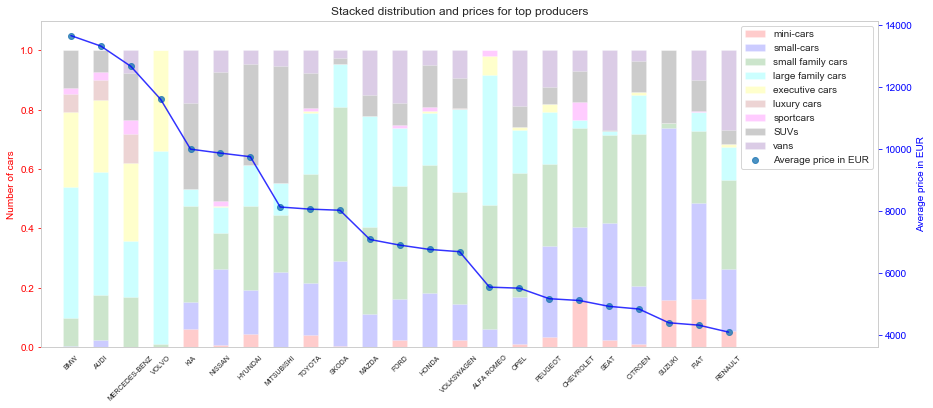

In [96]:
y1_axis=['r_A','r_B','r_C','r_D','r_E','r_F','r_S','r_SUV','r_V']
title='Stacked distribution and prices for top producers'
legend=['mini-cars', 'small-cars', 'small family cars', 'large family cars', 'executive cars','luxury cars','sportcars', 'SUVs',  'vans']
cars_functions.plot_stacked(producers_top25, 'producer', y1_axis, 'Number of cars', 'mean', 'Average price in EUR', [0,28,0,1.1],title, legend)


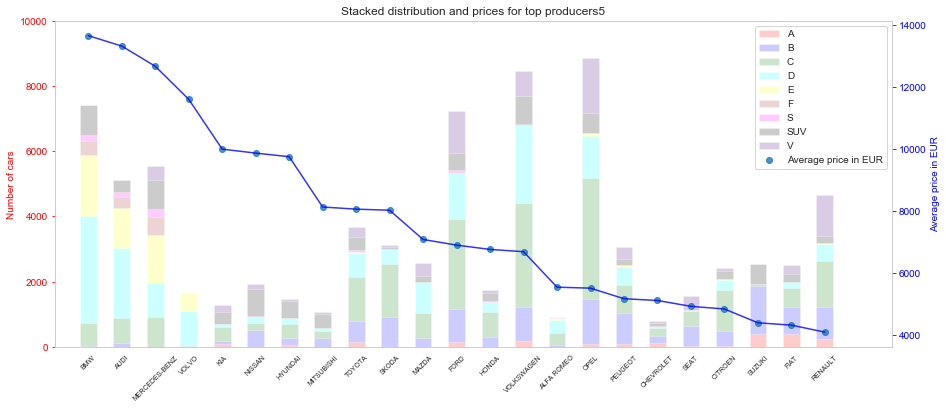

In [98]:
y1_axis=['A','B','C', 'D', 'E', 'F', 'S', 'SUV', 'V']
title='Stacked distribution and prices for top producers5'
cars_functions.plot_stacked(producers_top25, 'producer', y1_axis, 'Number of cars', 'mean', 'Average price in EUR', [0,25,0,10000],title, y1_axis)


In [ ]:
features_final.extend(('A','B','C', 'D','E','F', 'S','SUV'))  # drop 1 column e.g. V
features_filt.extend(('A','B','C', 'D','E','F', 'S','SUV'))   # drop 1 column e.g. V

In [100]:
producers_top40=cars_functions.df_groupby_to_plot(df_cars4,'producer', 'PriceEUR',['count', 'mean']).sort_values('count', ascending=False)

list_producers_top40=producers_top40[producers_top40['count']>100].producer.values
df_cars4['Producer_top']=df_cars4['producer'].apply(lambda x: x if x in list_producers_top40 else 'REST')


In [101]:
df_prod_dummies=pd.get_dummies(df_cars4['Producer_top'])
df_cars5= pd.concat([df_cars4, df_prod_dummies], axis=1)
#df_cars5

for producer in list_producers_top40:
    if producer!='REST':
        features_final.append(producer)  # drop 1 column e.g. V
        features_filt.append(producer)       

In [102]:
#get the average price for each type
#df_avgprice=df_cars5.groupby('cartype')['PriceEUR'].mean().reset_index()
#df_avgprice=df_avgprice.rename(columns={'PriceEUR': 'Price_avg'})

df_avgprice=cars_functions.df_groupby_to_plot(df_cars5,'cartype', 'PriceEUR', 'mean')
df_avgprice=df_avgprice.rename(columns={'PriceEUR': 'Price_avg'})


In [103]:
df_cars5=pd.merge(df_cars5, df_avgprice, how='left', on='cartype')
features_final.append('Price_avg')
features_filt.append('Price_avg')

In [104]:
#append target variable to the dataset
features_final.append('PriceEUR')
features_filt.append('PriceEUR')

#get the final dataset
df_cars_final=df_cars5[features_final]
df_cars_filt=df_cars5[features_filt]

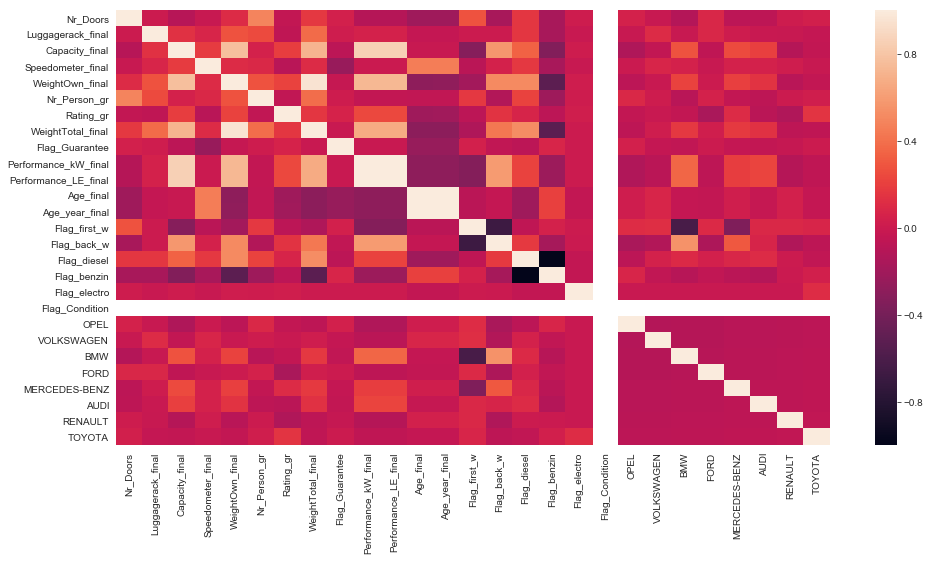

In [105]:
#heatmap for the correlation
#without the producers

df_cars_final_temp=df_cars_final.iloc[:,:27]
df_cars_final_temp.head()
df_corr=df_cars_final_temp.corr()
plt.figure(figsize=(16,8))
sns.heatmap(df_corr)
plt.savefig('correlation_heatmap')

In [106]:
#there is large correlation between the Performance features - we need to drop one - drop Performance_LE_final
#there is large correlation between the Pweight variables - we need to drop one - drop WeightOwn
#large negativ correlation between flag_diesel and flag_benzin - drop flag_benzin

df_cars_final=df_cars_final.drop(['Performance_LE_final', 'WeightOwn_final', 'Flag_benzin'], axis=1)
df_cars_filt=df_cars_filt.drop(['Performance_LE_filt', 'WeightOwn_filt', 'Flag_benzin'], axis=1)
df_cars_final.columns

Index(['Nr_Doors', 'Luggagerack_final', 'Capacity_final', 'Speedometer_final',
       'Nr_Person_gr', 'Rating_gr', 'WeightTotal_final', 'Flag_Guarantee',
       'Performance_kW_final', 'Age_final', 'Age_year_final', 'Flag_first_w',
       'Flag_back_w', 'Flag_diesel', 'Flag_electro', 'Flag_Condition', 'OPEL',
       'VOLKSWAGEN', 'BMW', 'FORD', 'MERCEDES-BENZ', 'AUDI', 'RENAULT',
       'TOYOTA', 'SKODA', 'PEUGEOT', 'MAZDA', 'SUZUKI', 'FIAT', 'CITROEN',
       'NISSAN', 'HONDA', 'VOLVO', 'SEAT', 'HYUNDAI', 'KIA', 'MITSUBISHI',
       'ALFA ROMEO', 'CHEVROLET', 'DAEWOO', 'DACIA', 'CHRYSLER', 'SMART',
       'LADA', 'LAND ROVER', 'MINI', 'LEXUS', 'SUBARU', 'LANCIA', 'JAGUAR',
       'SAAB', 'JEEP', 'PORSCHE', 'ROVER', 'DAIHATSU', 'SSANGYONG',
       'Price_avg', 'PriceEUR'],
      dtype='object')

In [107]:
df_cars_final.to_csv('data/df_cars_final.csv')
df_cars_final.head()

,Nr_Doors,Luggagerack_final,Capacity_final,Speedometer_final,Nr_Person_gr,Rating_gr,WeightTotal_final,Flag_Guarantee,Performance_kW_final,Age_final,...,LANCIA,JAGUAR,SAAB,JEEP,PORSCHE,ROVER,DAIHATSU,SSANGYONG,Price_avg,PriceEUR
0,5.0,450.0,1995.0,196624.0,3,3,2320.0,0,110.0,4181,...,0,0,0,0,0,0,0,0,14851.831050,8571.0
1,5.0,280.0,1197.0,38000.0,2,3,1620.0,0,66.0,1869,...,0,0,0,0,0,0,0,0,3232.922631,10604.0
2,5.0,500.0,1998.0,250000.0,2,2,2005.0,0,96.0,4181,...,0,0,0,0,0,0,0,0,7287.400570,5800.0
3,5.0,560.0,1995.0,249000.0,2,2,2365.0,0,135.0,3054,...,0,0,0,0,0,0,0,0,14430.805659,14504.0
4,5.0,295.0,1388.0,71000.0,2,2,1495.0,0,71.0,3085,...,0,0,0,0,0,0,0,0,4588.749014,7325.0


In [108]:
#further EDA:
#top 15 manufacturer with type in the hungarian market
top_type=cars_functions.df_groupby_to_plot(df_cars5,'cartype_corr', ['PriceEUR','Age_year_final','cartype'],{"cartype": "count", "PriceEUR": "mean", "Age_year_final": "mean"}).sort_values('cartype', ascending=False).head(16)
top_type

,cartype_corr,Age_year_final,PriceEUR,cartype
329,OPEL ASTRA,13.073931,4541.347586,3625
41,BMW 3ER,13.152160,9088.729852,3102
143,FORD FOCUS,11.244898,5350.382261,2548
466,VW GOLF,14.707547,5356.989746,2438
469,VW PASSAT,12.358531,7794.938661,2315
43,BMW 5ER,11.365190,14430.805659,1873
17,AUDI A4,12.864313,10029.110866,1813
406,SKODA OCTAVIA,8.908790,8562.541309,1513
271,MERCEDES E-KLASSE,14.554036,12365.705882,1462
149,FORD MONDEO,11.433357,7287.400570,1403


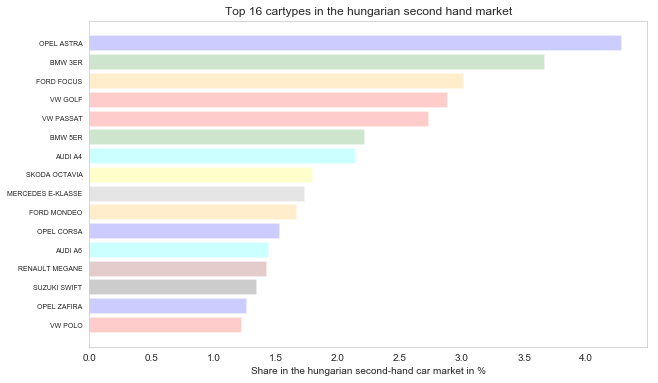

In [109]:
total=len(df_cars5)
top_type['ratio']=round(top_type['cartype']/total*100,2)

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

colors=['blue', 'green', 'orange', 'red', 'red', 'green', 'aqua', 'yellow', 'grey', 'orange', 'blue', 'aqua', 'maroon', 'black', 'blue','red']

y_pos=range(len(top_type['ratio']))
ax.barh(y_pos,top_type['ratio'], align='center', alpha=0.2,   color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(top_type['cartype_corr'], fontsize=7)
ax.invert_yaxis()  
ax.set_xlabel('Share in the hungarian second-hand car market in %')
ax.set_title('Top 16 cartypes in the hungarian second hand market')
ax.grid(False)
plt.savefig('Top16cartypes')

In [110]:
list_top_type=top_type['cartype_corr'].values
df_top_cars=df_cars5[df_cars5['cartype_corr'].isin(list_top_type)][['cartype_corr', 'Age_year_final', 'PriceEUR', 'Speedometer_final']]

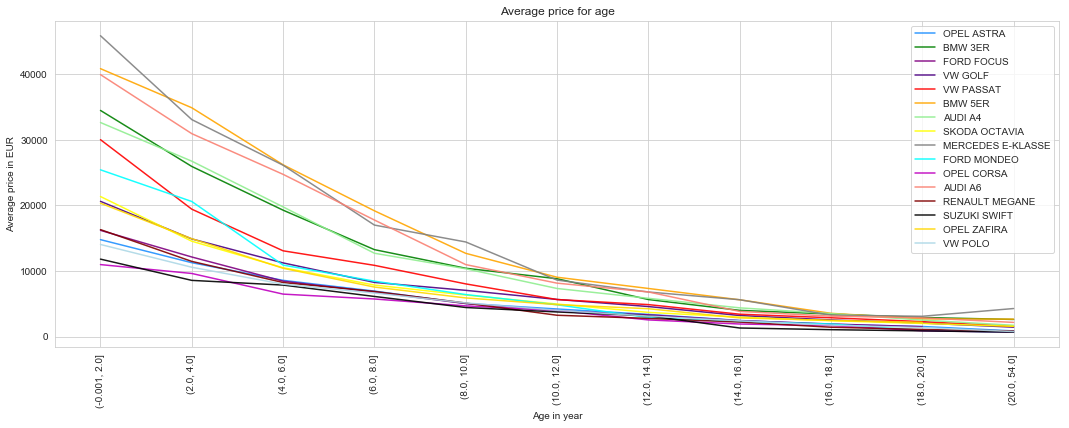

In [111]:
bins=[-0.001]
for i in range(1,11):
    bins.append(i*2)
#    bins.append(np.percentile(df_top_cars['Age_year_final'], i*10))
bins.append(df_top_cars['Age_year_final'].max())    

groups = df_top_cars.groupby([pd.cut(df_top_cars['Age_year_final'], bins),'cartype_corr' ])['PriceEUR'].agg(['count', 'mean']).reset_index()
colors=['dodgerblue', 'green', 'purple', 'indigo', 'red', 'orange', 'lightgreen', 'yellow', 'grey', 'aqua', 'm', 'salmon', 'maroon', 'black', 'gold','lightblue']
fig, ax= plt.subplots(figsize=(18,6))
for i, t in enumerate(list_top_type):    
    temp=groups[groups.cartype_corr==t][['Age_year_final', 'mean', 'count']]
    y=temp['mean']
    x=np.arange(1,len(y)+1)
    x_list=temp['Age_year_final']
    plt.plot(x , y, color=colors[i], label=str(t), alpha=0.9)
plt.legend(loc='upper right')
plt.xlabel('Age in year')
plt.ylabel('Average price in EUR')
plt.title('Average price for age')
ax.set_xticks(x)
ax.set_xticklabels(x_list, rotation=90)
plt.show()

In [112]:
bins=[-0.001]
for i in range(1,10):
    new_bin=np.percentile(df_top_cars['Speedometer_final'], i*10)
    new_bin=int(new_bin/1000)*1000
    bins.append(new_bin)
bins

[-0.001, 56000, 112000, 145000, 167000, 186000, 206000, 230000, 259000, 299000]

[Text(0, 0, '(-0.001, 56000.0]'),
 Text(0, 0, '(56000.0, 112000.0]'),
 Text(0, 0, '(112000.0, 145000.0]'),
 Text(0, 0, '(145000.0, 167000.0]'),
 Text(0, 0, '(167000.0, 186000.0]'),
 Text(0, 0, '(186000.0, 206000.0]'),
 Text(0, 0, '(206000.0, 230000.0]'),
 Text(0, 0, '(230000.0, 259000.0]'),
 Text(0, 0, '(259000.0, 299000.0]'),
 Text(0, 0, '(299000.0, 3000000.0]')]

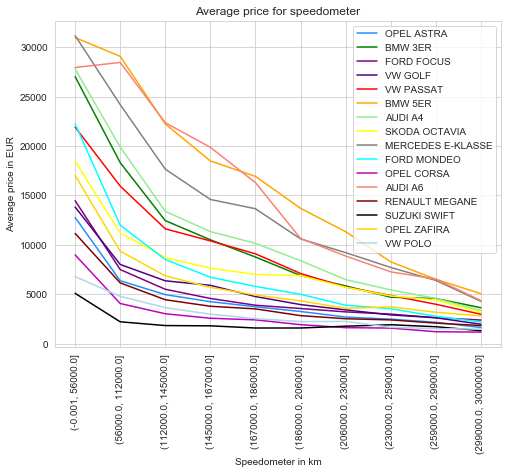

In [113]:
bins=[-0.001]
for i in range(1,10):
    new_bin=np.percentile(df_top_cars['Speedometer_final'], i*10)
    new_bin=int(new_bin/1000)*1000
    bins.append(new_bin)
bins.append(df_top_cars['Speedometer_final'].max())    

groups = df_top_cars.groupby([pd.cut(df_top_cars['Speedometer_final'], bins),'cartype_corr' ])['PriceEUR'].agg(['count', 'mean']).reset_index()
colors=['dodgerblue', 'green', 'purple', 'indigo', 'red', 'orange', 'lightgreen', 'yellow', 'grey', 'aqua', 'm', 'salmon', 'maroon', 'black', 'gold','lightblue']
fig, ax= plt.subplots(figsize=(8,6))
for i, t in enumerate(list_top_type):    
    temp=groups[groups.cartype_corr==t][['Speedometer_final', 'mean', 'count']]
    y=temp['mean']
    x=np.arange(1,len(y)+1)
    x_list=temp['Speedometer_final']
    plt.plot(x , y, color=colors[i], label=str(t))
plt.legend(loc='upper right')
plt.xlabel('Speedometer in km')
plt.ylabel('Average price in EUR')
plt.title('Average price for speedometer')
ax.set_xticks(x)
ax.set_xticklabels(x_list, rotation=90)

In [114]:
#which has much influence on the price: change in the km or change in the age
#to compare this, at first I needed to scale the 2 features

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
temp_scaled=std_scaler.fit_transform(df_cars5[['Speedometer_final', 'Age_final', 'Age_year_final']])
df_cars5['Speedometer_final_std'] = temp_scaled[:,0]
df_cars5['Age_final_std'] = temp_scaled[:,1] 
df_cars5['Age_year_final_std'] = temp_scaled[:,2] 



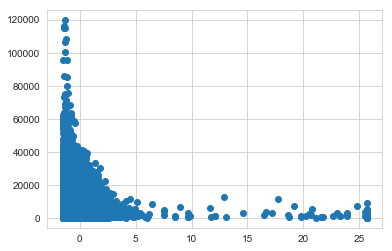

In [115]:
plt.scatter(df_cars5['Speedometer_final_std'], df_cars5['PriceEUR'])

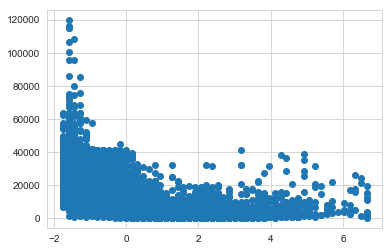

In [116]:
plt.scatter(df_cars5['Age_year_final_std'], df_cars5['PriceEUR'])


In [117]:
#check which has a greater influence: Age has a bigger coefficient in absolute value, it has a 4 times bigger influence
X=df_cars5[['Age_year_final_std', 'Speedometer_final_std']]
y=df_cars5['PriceEUR']

import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               PriceEUR   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                 3.687e+04
Date:                Thu, 13 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:25:45   Log-Likelihood:            -8.5942e+05
No. Observations:               84723   AIC:                         1.719e+06
Df Residuals:                   84720   BIC:                         1.719e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  8029.72

In [118]:
bins=[-0.001]
for i in range(1,10):
    new_bin=np.percentile(df_cars5['Speedometer_final'], i*10)
    #new_bin=int(new_bin/1000)*1000
    bins.append(new_bin)
bins.append(df_cars5['Speedometer_final'].max())    

groups_speedometer = df_cars5.groupby(pd.cut(df_cars5['Speedometer_final'], bins))['PriceEUR'].agg(['count', 'mean']).reset_index()
groups_speedometer

,Speedometer_final,count,mean
0,"(-0.001, 29796.0]",8473,19759.591880
1,"(29796.0, 89428.4]",8472,13565.769594
2,"(89428.4, 123105.4]",8472,8615.303824
3,"(123105.4, 148000.0]",8601,7334.016161
4,"(148000.0, 169000.0]",8586,6651.824249
5,"(169000.0, 188790.4]",8230,6005.994654
6,"(188790.4, 210041.4]",8472,5376.152856
7,"(210041.4, 239161.8]",8472,4830.234419
8,"(239161.8, 280569.6]",8472,4361.758735
9,"(280569.6, 3000000.0]",8473,3767.049923


In [119]:
df_cars5.columns

Index(['Nr_Doors', 'Luggagerack', 'Guarantee', 'Propulsion', 'Capacity',
       'Speedometer', 'WeightOwn', 'Nr_Person', 'ad_nr', 'boardcomputer',
       ...
       'SSANGYONG', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO',
       'Price_avg', 'Speedometer_final_std', 'Age_final_std',
       'Age_year_final_std'],
      dtype='object', length=116)

In [120]:
bins=[-0.001]
for i in range(1,10):
    new_bin=np.percentile(df_cars5['Age_final'], i*10)
    #new_bin=int(new_bin/1000)*1000
    bins.append(new_bin)
bins.append(df_cars5['Age_final'].max())    

groups_age = df_cars5.groupby(pd.cut(df_cars5['Age_final'], bins))['PriceEUR'].agg(['count', 'mean']).reset_index()
groups_age

,Age_final,count,mean
0,"(-0.001, 1534.0]",8659,21940.447858
1,"(1534.0, 2385.0]",8397,16555.589020
2,"(2385.0, 3207.0]",8409,11976.460340
3,"(3207.0, 3999.0]",8514,8069.739723
4,"(3999.0, 4546.0]",8455,6045.278888
5,"(4546.0, 5095.0]",8594,4720.464510
6,"(5095.0, 5642.0]",8435,3744.135862
7,"(5642.0, 6372.0]",8648,2925.152174
8,"(6372.0, 7409.0]",8271,2190.343127
9,"(7409.0, 20000.0]",8341,1823.716821


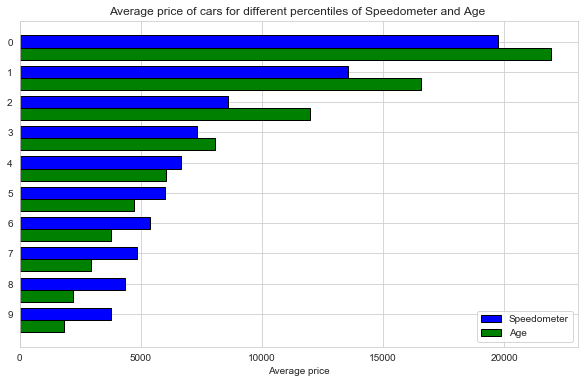

In [121]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

width=0.4
y_pos=np.arange(len(groups_speedometer['Speedometer_final']))
ax.barh(y_pos,groups_speedometer['mean'], width, align='center',  edgecolor='k',  color='b', label='Speedometer')
ax.barh(y_pos+ width, groups_age['mean'],  width,align='center',  edgecolor='k',  color='g', label='Age')
ax.set_yticks(y_pos)
#ax.set_yticklabels(top_type['cartype_corr'])
ax.invert_yaxis()  
ax.set_xlabel('Average price')
ax.set_title('Average price of cars for different percentiles of Speedometer and Age ')
ax.legend()

#the age of the car is more relevant, than the speedometer -> the age can differentiate better among the prices



In [122]:
groups_speedometer['Difference']=np.nan
groups_age['Difference']=np.nan

for i in np.arange(len(groups_speedometer['Speedometer_final'])-1):
    groups_speedometer.iloc[i,-1]=groups_speedometer['mean'][i]-groups_speedometer['mean'][i+1]
    groups_age.iloc[i,-1]=groups_age['mean'][i]-groups_age['mean'][i+1]

groups_age

,Age_final,count,mean,Difference
0,"(-0.001, 1534.0]",8659,21940.447858,5384.858838
1,"(1534.0, 2385.0]",8397,16555.589020,4579.128680
2,"(2385.0, 3207.0]",8409,11976.460340,3906.720617
3,"(3207.0, 3999.0]",8514,8069.739723,2024.460835
4,"(3999.0, 4546.0]",8455,6045.278888,1324.814378
5,"(4546.0, 5095.0]",8594,4720.464510,976.328648
6,"(5095.0, 5642.0]",8435,3744.135862,818.983689
7,"(5642.0, 6372.0]",8648,2925.152174,734.809047
8,"(6372.0, 7409.0]",8271,2190.343127,366.626306
9,"(7409.0, 20000.0]",8341,1823.716821,NaN


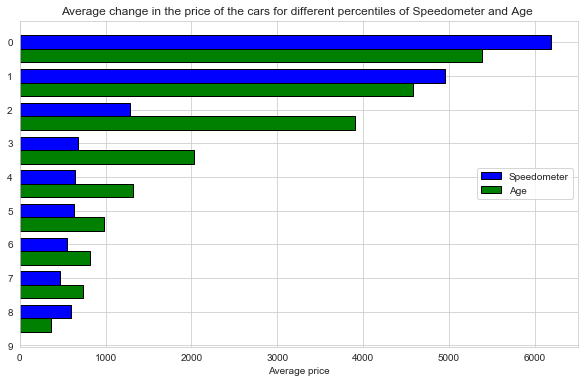

In [123]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

width=0.4
y_pos=np.arange(len(groups_speedometer['Speedometer_final']))
ax.barh(y_pos,groups_speedometer['Difference'], width, align='center',  edgecolor='k',  color='b', label='Speedometer')
ax.barh(y_pos+ width, groups_age['Difference'],  width,align='center',  edgecolor='k',  color='g', label='Age')
ax.set_yticks(y_pos)
#ax.set_yticklabels(top_type['cartype_corr'])
ax.invert_yaxis()  
ax.set_xlabel('Average price')
ax.set_title('Average change in the price of the cars for different percentiles of Speedometer and Age ')
ax.legend(loc='best')


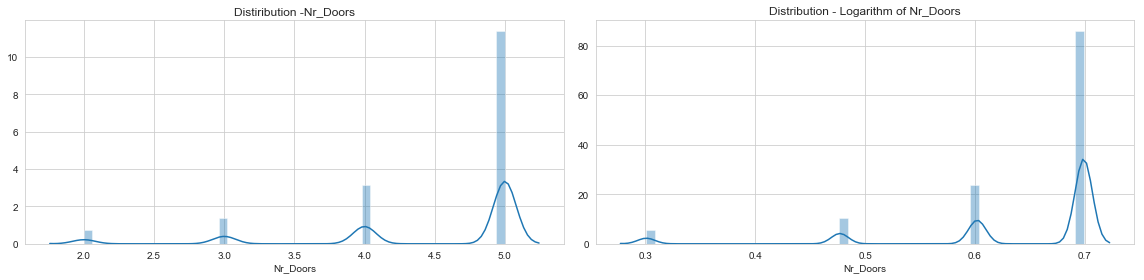

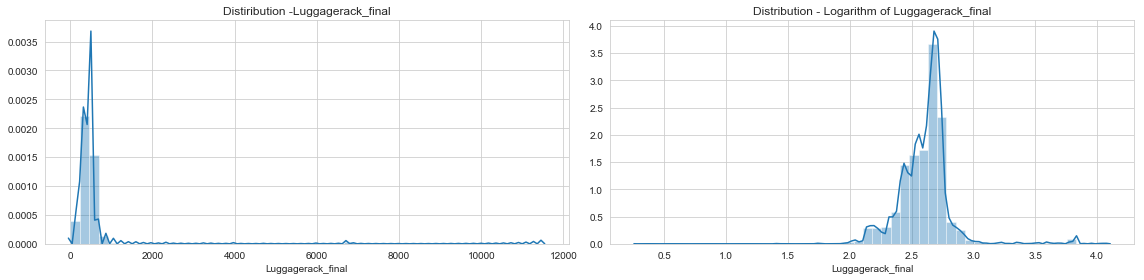

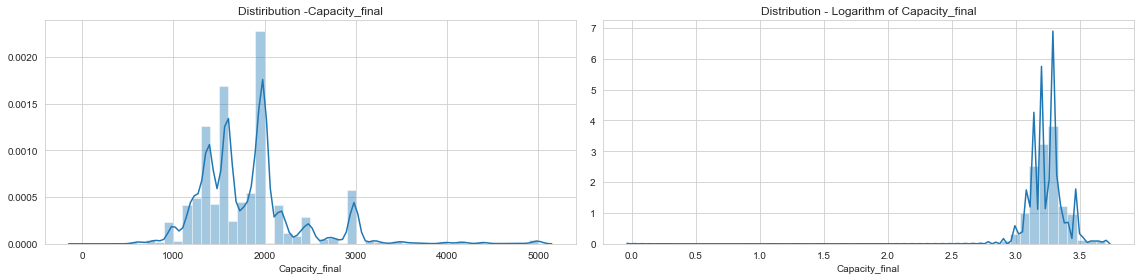

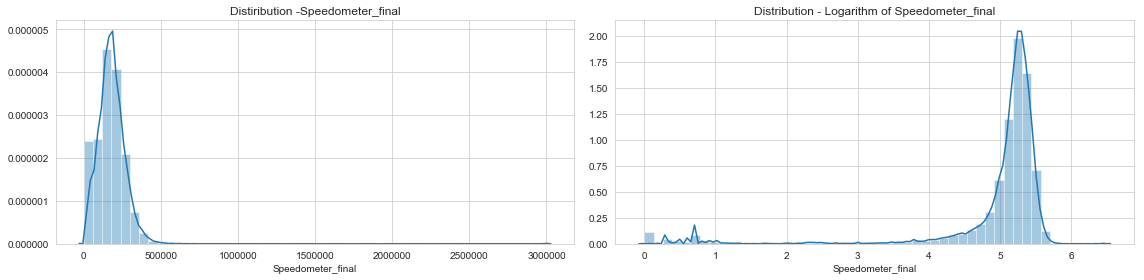

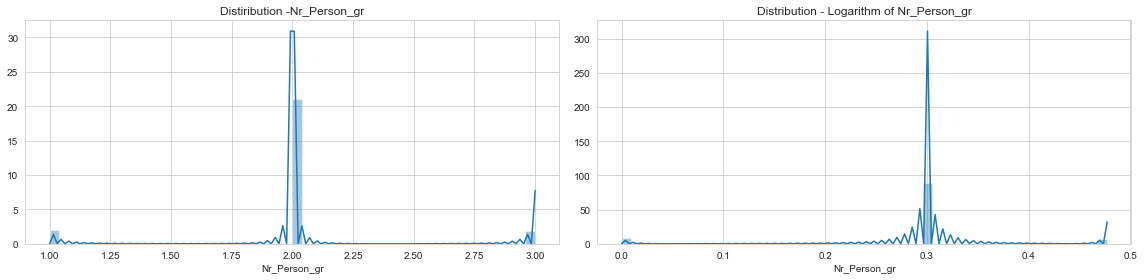

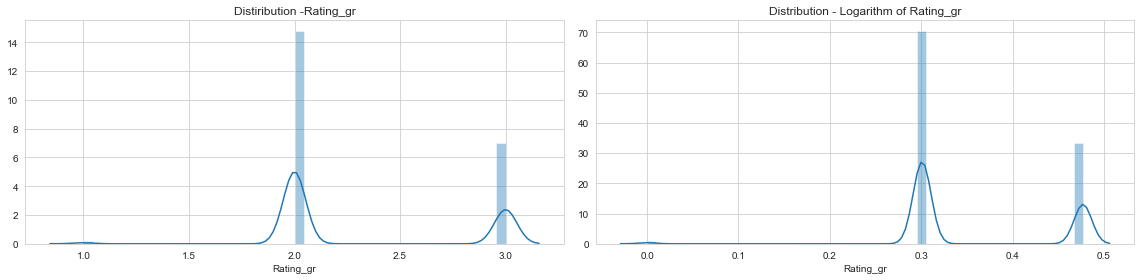

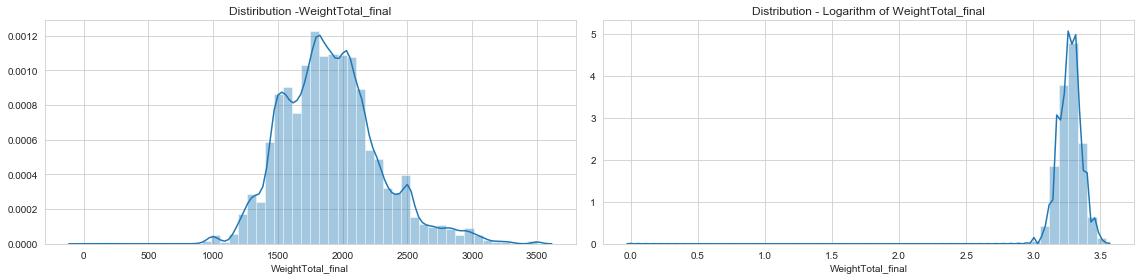

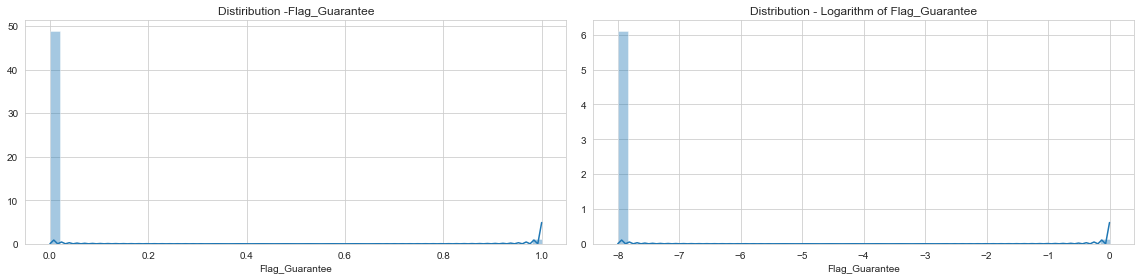

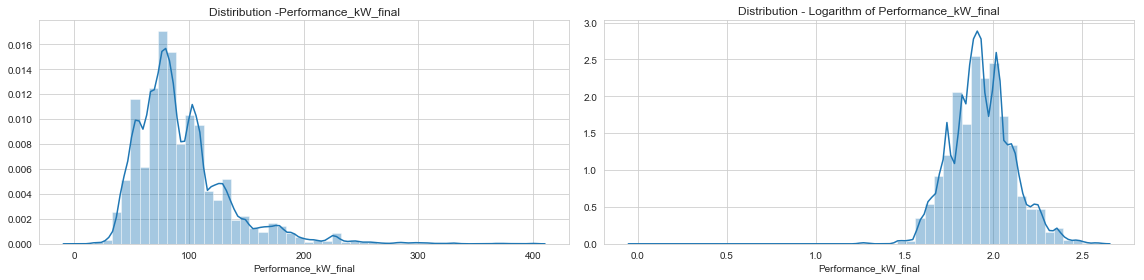

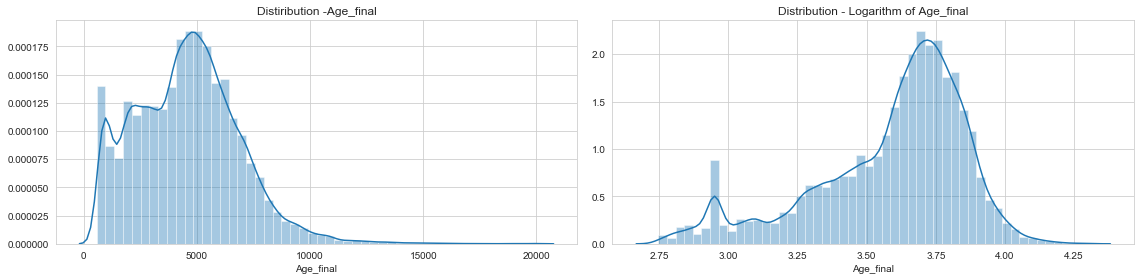

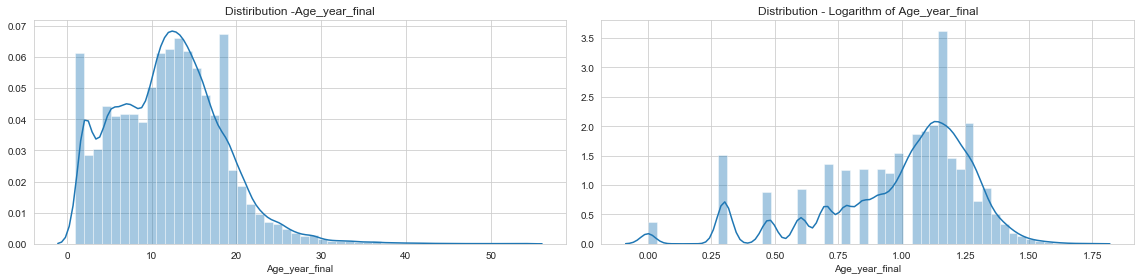

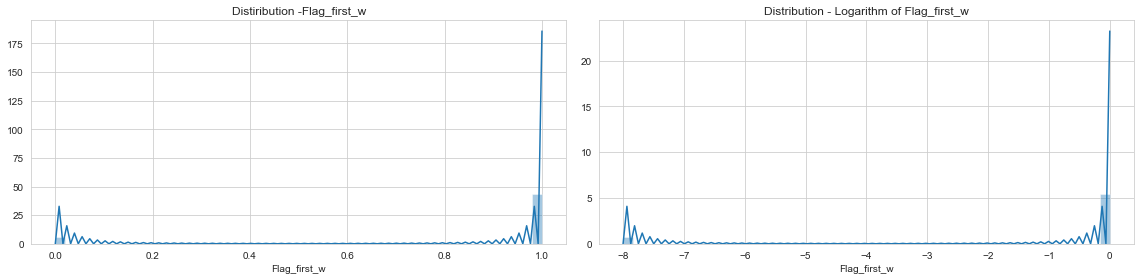

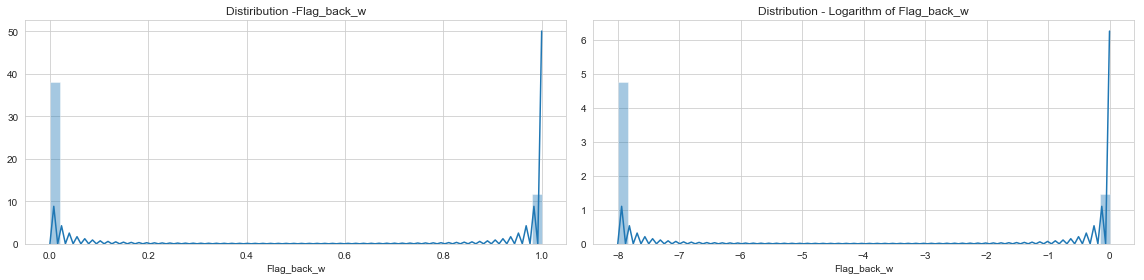

In [124]:
#temp=df_cars_final.iloc[:,:13]
columns=df_cars_final.iloc[:,:13].columns

for col in columns:
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 4))
    ax = sns.distplot(df_cars_final[col],kde=True, ax=axes[0])
    ax.set_title('Distiribution -'+str(col))
    ax = sns.distplot(np.log10(df_cars_final[col]+0.00000001),kde=True, ax=axes[1])
    ax.set_title('Distribution - Logarithm of ' + str(col))
    plt.tight_layout()
#To get a better distribution by luggagerach and years, we should take the logarithm of the features
#no need to take the log of the variables - the features wont be normally distributed


Check prices for different cartypes 